# Predizione del peso di un individuo in base alle proprie abitudini alimentari, allo stile di vita e alle caratteristiche fisiche.

#### Elaborato di Programmazione di Applicazioni Data Intensive
Laurea in Ingegneria e Scienze Informatiche  
Università di Bologna, Cesena
  
Giovanni Muccioli  
`giovanni.muccioli@studio.unibo.it`

#### Obiettivo

Si vuole realizzare un modello di regressione che sia capace di predire al meglio il peso di un individuo, sulla base di diversi aspetti riguardanti le abitudini alimentari e lo stile di vita della persona, ma anche in base ad alcune caratteristiche fisiche.  

Tale modello predittivo avrà quindi lo scopo di individuare ed evidenziare quali fattori influenzano maggiormente la predizione, consentendone cioè una comprensione chiara ed approfondita dei fattori che incidono in modo rilevante nella determinazione del peso di una persona.

#### Fonte   

Il dataset oggetto dell'analisi è stato acquisito da UCI Machine Learning Repository (https://archive.ics.uci.edu/ml).  
URL dataset: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

#### Descrizioni generali del contesto   

Il dataset contiene informazioni di 2111 individui provenienti dai paesi di Messico, Perù e Colombia, in base alle loro abitudini alimentari, allo stile di vita, alle condizioni e caratteristiche fisiche.  
Tutte queste informazioni popolano il dataset, caratterizzato da 17 diverse variabili.

In [1]:
# Importazioni prime librerie necessarie per la gestione e l'analisi dei dati
import numpy as np
import pandas as pd

In [2]:
# URL file CSV da repository GitHub
URL_dataset = "https://raw.githubusercontent.com/gio-muccio/Elaborato_Data_Intensive/main/ObesityDataSet_raw_and_data_sinthetic.csv"

dataset = pd.read_csv(URL_dataset)

# Visualizzazione dataset iniziale
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Analizziamo dunque le variabili presenti.

1. `Gender`: Rappresenta il genere dell'individuo, che può essere "Female" (femmina) o "Male" (maschio).
2. `Age`: Rappresenta l'età dell'individuo.
3. `Height`: Rappresenta l'altezza dell'individuo, espressa in metri.
4. `Weight`: Rappresenta il peso dell'individuo, espresso in chilogrammi.
5. `family_history_with_overweight`: Indica se l'individuo ha una familiarità in termini di sovrappeso, ossia se possiede (o possedeva) familiari in sovrappeso. Può assumere i valori "yes" o "no".
6. `FAVC`: Rappresenta se l'individuo consuma frequentemente alimenti ad alto contenuto calorico (cosiddetto "cibo spazzatura", ossia ad alto contenuto di grassi e zuccheri). Può assumere i valori "yes" o "no". 
7. `FCVC`: Rappresenta il numero di pasti in cui l'individuo assume verdure, espresso in una scala da 1 a 3.
8. `NCP`: Rappresenta il numero di pasti principali consumati giornalmente dall'individuo, espresso in una scala da 1 a 4.
9. `CAEC`: Rappresenta la frequenza di consumo di cibo al di fuori dei pasti principali da parte dell'individuo. Può assumere i valori "Sometimes", "Frequently", "Always", "no".
10. `SMOKE`: Indica se l'individuo fuma o meno. Può assumere i valori "yes" o "no".
11. `CH2O`: Rappresenta il consumo di acqua da parte dell'individuo, espresso in una scala da 1 a 3.
12. `SCC`: Indica se l'individuo monitora le calorie che consuma quotidianamente. Il monitoraggio delle calorie può essere utile sia per la gestione del peso che per la salute generale. Può assumere i valori "yes" o "no".
13. `FAF`: Rappresenta la frequenza dei giorni alla settimana di attività fisica da parte dell'individuo, espresso in una scala da 0 a 3.
14. `TUE`: Rappresenta il tempo di utilizzo dei dispositivi tecnologici, ossia il tempo dedicato alle attività sedentarie da parte dell'individuo (per esempio il tempo trascorso davanti al computer, allo smartphone, alla tv, ecc.),  espresso in una scala da 0 a 2.
15. `CALC`: Rappresenta l'assunzione di alcol da parte dell'individuo, espresso nei possibili seguenti valori: "Sometimes", "Frequently", "Always", "no".
16. `MTRANS`: Rappresenta il mezzo di trasporto principale utilizzato dall'individuo. Può assumere diversi valori, ad esempio "Public_Transportation", "Walking", "Automobile", "Motorbike", "Bike".
17. `NObeyesdad`: Rappresenta la classe di obesità di ciascun individuo. Può essere "Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II" o "Obesity_Type_III".

#### Osservazioni e precisazioni

Prima di poter iniziare con l'analisi, è bene notare la seguente precisazione presente nella pagina contenente il dataset: "Il 77% dei dati è stato generato sinteticamente utilizzando lo strumento Weka e il filtro SMOTE, il 23% dei dati è stato raccolto direttamente dagli utenti attraverso una piattaforma web".


La tecnica SMOTE è utilizzata nei contesti legati a problemi di classificazione quando si vuole ottenere un modello di classificazione dove i dati di partenza sono sbilanciati.  
Attraverso questa tecnica, si ottiene un'aggiunta di variabili artificiali che sono coerenti alla classe meno numerosa. Questo aiuta di fatti a bilanciare il dataset con lo scopo di migliorare le prestazioni durante l'addestramento del modello.  
Tale accorgimento potrebbe essere di estrema importanza per creare un modello di classificazione che classifichi un individuo per livelli di obesità.


Essendo però il nostro scopo creare un modello di regressione che sia in grado di predire il peso di un individuo (e non a quale livello di obesità appartiene, cioè non un problema di classificazione) dobbiamo porre attenzione alla struttura e ai valori dei dati messi a disposizione.  
Anzitutto, le variabili fornite possono essere utili per creare un modello predittivo approssimativo del peso di un individuo: la previsione del peso è un processo complesso e dipende da molti fattori che potrebbero non essere completamente rappresentati da queste variabili. Tuttavia, molte delle variabili fornite possono avere un impatto sul peso di una persona e possono quindi essere considerate valide per la predizione approssimativa del peso.  
Inoltre, una parte dei dati presenti nel dataset non è di origine reale: non provengono da utenti reali, ma provengono da dati creati artificialmente.  
Questo è un aspetto importante da tenere in considerazione quando si analizza il dataset, poiché potrebbe influenzare l'analisi e l'affidabilità dei modelli addestrati su di esso, nonostante sia un'ottima tecnica per risolvere problemi di classificazione quando si hanno classi sbilanciate.  
La generazione sintetica dei dati potrebbe introdurre delle peculiarità o bias nei dati, e pertanto è fondamentale valutare attentamente la qualità e l'attendibilità delle informazioni presenti.  
È proprio con tale premessa che è bene effettuare una manipolazione e una sistemazione dei dati. 

In [3]:
# Iniziali valori decimali per l'età (Age)
dataset["Age"]

0       21.000000
1       21.000000
2       23.000000
3       27.000000
4       22.000000
          ...    
2106    20.976842
2107    21.982942
2108    22.524036
2109    24.361936
2110    23.664709
Name: Age, Length: 2111, dtype: float64

La presenza di "dati artificiali" è evidente, per esempio, analizzando le diverse età (`Age`) delle persone: è chiaro che i valori riguardanti l'età debbano essere dei valori interi, e non dei valori decimali. Tuttavia, durante la generazione sintetica con SMOTE, si sono ottenuti nuovi valori, come per esempio un'età pari a _20.976842._  
È un valore decimale che ovviamente andrà manipolato: tali valori decimali saranno arrotondati all'intero più vicino.  


Inoltre, dall'esplorazione e dalla consultazione della variabile `FCVC` che rappresenta il numero di pasti in cui l'individuo mangia verdure espresso in una scala da 1 a 3 ...

In [4]:
dataset["FCVC"].unique()[:20]

array([2.      , 3.      , 1.      , 2.450218, 2.880161, 2.00876 ,
       2.596579, 2.591439, 2.392665, 1.123939, 2.027574, 2.658112,
       2.88626 , 2.714447, 2.750715, 1.4925  , 2.205439, 2.059138,
       2.310423, 2.823179])

In [5]:
dataset["FCVC"].value_counts()

3.000000    652
2.000000    600
1.000000     33
2.823179      2
2.214980      2
           ... 
2.927409      1
2.706134      1
2.010684      1
2.300408      1
2.680375      1
Name: FCVC, Length: 810, dtype: int64

Si osserva come vi sia una predominanza di valori che assumono valori in una scala da 1 a 3, con valori interi.  
Emerge, però, come vi siano valori decimali che con buona probabilità sono stati realizzati in modo artificiale come spiegato precedentemente tramite la tecnica SMOTE.  

Se ne deduce come sia meglio trattare tali dati non tanto come valori decimali, bensì come valori categorici interi che variano in una scala da 1 a 3. Tali valori decimali, quindi, saranno arrotondati all'intero più vicino, per poi definirli di tipo categorico.

Infine, nonostante la pagina contenente il dataset specificasse come non vi fossero presenti valori mancanti, si verifica di seguito la veridicità dell'affermazione in modo tale da non avere potenziali problemi durante l'addestramento del modello.

In [6]:
dataset.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Si dimostra come non vi siano valori mancanti.    

Di seguito si imporranno gli accorgimenti sopra citati intervenendo sui dati che lo necessitano, per poi procedere con l'analisi.

## Manipolazione e preparazione dei dati

Riprendendo la definizione delle variabili, si interviene manipolando ciascuna di esse in modo coerente.  


Anziutto, vi sono delle variabili che sono definibili come categoriche ordinali poichè assumono valori all'interno di una scala (es: da 1 a 3, da 1 a 4, ecc...).  
Ricordando che le variabili che assumono valori all'interno di una scala sono:  
- `FCVC`,
- `NCP`,
- `CH2O`, 
- `FAF`,
- `TUE`,

i relativi dati dovranno essere trasformati in valori interi per poi essere arrotondati all'intero più vicino (quindi non dovranno essere valori decimali). Una volta fatto ciò, allora dovranno essere definiti come categorici.

In [7]:
dataset["FCVC"] = dataset["FCVC"].round().astype("int64")
dataset["NCP"] = dataset["NCP"].round().astype("int64")
dataset["CH2O"] = dataset["CH2O"].round().astype("int64")
dataset["FAF"] = dataset["FAF"].round().astype("int64")
dataset["TUE"] = dataset["TUE"].round().astype("int64")

In [8]:
dataset["FCVC"].unique() , dataset["NCP"].unique(), dataset["CH2O"].unique(), dataset["FAF"].unique() ,dataset["TUE"].unique()

(array([2, 3, 1], dtype=int64),
 array([3, 1, 4, 2], dtype=int64),
 array([2, 3, 1], dtype=int64),
 array([0, 3, 2, 1], dtype=int64),
 array([1, 0, 2], dtype=int64))

Ora assumono valori interi coerentemente alla propria scala.

Prima di procedere alla conversione, allo stesso tempo si osservano anche altre variabili categoriche ordinali, i quali valori non sono espressi all'interno di una scala bensì da stringhe che ne definiscono pur sempre una relazione d'ordine.  
Tali ulteriori variabili categoriche ordinali sono:  
- `CAEC`,
- `CALC`

I possibili valori sono i seguenti:

In [9]:
dataset["CALC"].unique(), dataset["CAEC"].unique()

(array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object),
 array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object))

Infine si osservano anche variabili categoriche nominali, dove tra le categorie possibili non sussiste un ordine intrinseco.  
Le variabili categoriche nominali sono:
- `Gender`,
- `family_history_with_overweight`,
- `FAVC`,
- `SMOKE`,
- `SCC`,
- `MTRANS`,
- `NObeyesdad`.  

Si procede, quindi, imponendo che tali variabili categoriche siano anche definite come tali in memoria. Ad ora, non possono essere definite categoriche poichè le variabili categoriche ordinali, espresse da valori che risiedono all'interno di una scala, sono riconosciute come variabili di tipo intero, mentre le restanti variabili categoriche (le altre due categoriche ordinali sopra precisate e le categoriche nominali) sono riconosciute come semplici stringhe, e non come categorie.

In [10]:
dataset.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   int64  
 7   NCP                             2111 non-null   int64  
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   int64  
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Si impone quindi di seguito che tutte le variabili definite come categoriche vengano riconosciute come tali anche in memoria.

In [11]:
variables_dtypes = {
    "Gender": "category",
    "family_history_with_overweight": "category",
    "FAVC": "category",
    "FCVC": "category",
    "NCP": "category",
    "CAEC": "category",
    "SMOKE": "category",
    "CH2O": "category",
    "SCC": "category",
    "FAF": "category",
    "TUE": "category",
    "CALC": "category",
    "MTRANS": "category",
    "NObeyesdad": "category"
}

dataset = dataset.astype(variables_dtypes)

In [12]:
# Visualizzazione di qualche variabile categorica
dataset["Gender"].unique() , dataset["family_history_with_overweight"].unique() , dataset["CAEC"].unique() , dataset["NCP"].unique()

(['Female', 'Male']
 Categories (2, object): ['Female', 'Male'],
 ['yes', 'no']
 Categories (2, object): ['no', 'yes'],
 ['Sometimes', 'Frequently', 'Always', 'no']
 Categories (4, object): ['Always', 'Frequently', 'Sometimes', 'no'],
 [3, 1, 4, 2]
 Categories (4, int64): [1, 2, 3, 4])

Si procede imponendo l'accorgimento sull'età notato precedentemente: si vuole che essa sia espressa da valori interi e non da valori decimali. Verrà applicato quindi un arrotondamento all'intero più vicino.  

In [13]:
dataset["Age"] = dataset["Age"].round().astype("int64")

Anche le variabili `Height` e `Weight` subiranno un arrotondamento: 
- l'altezza (`Height`), essendo espressa in metri, è solita essere rappresentata con due cifre decimali.
- il peso (`Weight`), essendo espresso in chilogrammi, è solito essere rappresentato con due cifre decimali.

In [14]:
# Iniziali valori non arrotondati per l'altezza (Height)
dataset["Height"]

0       1.620000
1       1.520000
2       1.800000
3       1.800000
4       1.780000
          ...   
2106    1.710730
2107    1.748584
2108    1.752206
2109    1.739450
2110    1.738836
Name: Height, Length: 2111, dtype: float64

Si nota come non tutti i valori relativi all'altezza siano limitati a due valori decimali. Quindi si applicherà questo arrotondamento per tutti i valori.

In [15]:
dataset["Height"] = dataset["Height"].round(2)
dataset["Height"]

0       1.62
1       1.52
2       1.80
3       1.80
4       1.78
        ... 
2106    1.71
2107    1.75
2108    1.75
2109    1.74
2110    1.74
Name: Height, Length: 2111, dtype: float64

Il medesimo discorso vale anche per il peso `Weight`, come anticipato.

In [16]:
dataset["Weight"] = dataset["Weight"].round(2)
dataset["Weight"]

0        64.00
1        56.00
2        77.00
3        87.00
4        89.80
         ...  
2106    131.41
2107    133.74
2108    133.69
2109    133.35
2110    133.47
Name: Weight, Length: 2111, dtype: float64

Si visualizzano di seguito le modifiche apportate alle variabili con i relativi dettagli sull'uso di memoria.

In [17]:
dataset.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2111 non-null   category
 1   Age                             2111 non-null   int64   
 2   Height                          2111 non-null   float64 
 3   Weight                          2111 non-null   float64 
 4   family_history_with_overweight  2111 non-null   category
 5   FAVC                            2111 non-null   category
 6   FCVC                            2111 non-null   category
 7   NCP                             2111 non-null   category
 8   CAEC                            2111 non-null   category
 9   SMOKE                           2111 non-null   category
 10  CH2O                            2111 non-null   category
 11  SCC                             2111 non-null   category
 12  FAF                 

Una volta manipolati i dati che lo necessitavano, il dataset finale (ossia quello su cui avverrà l'analisi e quello su cui si baserà il modello) è il seguente:

In [18]:
# Visualizzazione dataset a seguito della manipolazione dei dati
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III


## Analisi esplorativa

Di seguito, si analizzano la distribuzione e le caratteristiche dei dati per ciascuna colonna, ossia per ciascuna variabile.

In [19]:
# Importazione librerie necessarie per realizzazione grafici
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
dataset.describe()

,Age,Height,Weight
count,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035
std,6.357078,0.093368,26.191163
min,14.000000,1.450000,39.000000
25%,20.000000,1.630000,65.470000
50%,23.000000,1.700000,83.000000
75%,26.000000,1.770000,107.430000
max,61.000000,1.980000,173.000000


Dai valori ottenuti, se ne deducono le seguenti informazioni:

- `Age`:  
    - Ci sono 2111 valori non nulli. Si ha quindi nuovamente conferma di come non vi siano valori mancanti per tale variabile. 
    - L'età media è di circa 24 anni.
    - La deviazione standard è di circa 6.36 anni, indicando una dispersione dei valori relativamente bassa. I dati, infatti, sono raggruppati intorno alla media: l'età delle persone è relativamente omogenea intorno ai 24 anni, ma ci possono essere alcune persone più giovani o più anziane con una differenza rispetto alla media che può arrivare fino a circa 6 anni.
    - L'età minima è di 14 anni: indica la persona più giovane.
    - L'età massima è di di 61 anni: indica la persona più anziana.
    - Il 25% (primo quartile) dei dati ha un'età inferiore o uguale a 20 anni, mentre il 75% (terzo quartile) dei dati ha un'età inferiore o uguale a 26 anni.
    - La medianda dell'età è 23. Indica il valore centrale dell'età nel dataset: il 50% dei dati ha un'età superiore a 23 anni e il restante 50% ha un'età inferiore a 23 anni.

- `Height`:
    - Ci sono 2111 valori non nulli. Si ha quindi nuovamente conferma di come non vi siano valori mancanti per tale variabile.
    - L'altezza media è di circa 1.70 metri.
    - La deviazione standard è di circa 0.09 metri (ossia 9 centimetri), indicando una bassa dispersione intorno alla media.
    - L'altezza minima è di 1.45 metri: indica la persona più bassa.
    - L'altezza massima è di 1.98 metri: indica la persona più alta.
    - Il 25% dei dati ha un'altezza inferiore o uguale a 1.63 metri, mentre il 75% dei dati ha un'altezza inferiore o uguale a 1.77 metri.
    - La mediana dell'altezza è 1.70. Indica il valore centrale dell'altezza nel dataset: il 50% dei dati ha un'altezza superiore a 1.70 metri e il restante 50% ha un'altezza inferiore a 1.70 metri.

- `Weight`:
    - Ci sono 2111 valori non nulli. Si ha quindi nuovamente conferma di come non vi siano valori mancanti per tale variabile.
    - Il peso medio è di circa 86.59 kg.
    - La deviazione standard è di circa 26.19 kg, indicando una dispersione dei valori relativamente alta rispetto alla media. Questo valore suggerisce una certa variabilità nei pesi delle persone all'interno del dataset, ma è un risultato che si può definire come prevedibile essendo un dataset in cui si hanno diversi livelli di obesità e quindi svariati pesi.
    - Il peso minimo è di 39 kg: indica chiaramente un peso molto basso il quale fa pensare che corrisponda ad una persona definibile di peso insufficiente.
    - Il peso massimo è di 173 kg: indica chiaramente un peso molto alto il quale fa pensare che corrisponda ad una persona definibile come "obesa".
    - Il 25% dei dati ha un peso inferiore o uguale a 65.47 kg, mentre il 75% dei dati ha un peso inferiore o uguale a 107.43 kg.
    - La mediana del peso è di 83 kg. Indica il valore centrale del peso nel dataset: il 50% dei dati ha un peso superiore a 83 kg e il restante 50% ha un peso inferiore a 83 kg.

Potrebbe essere curioso capire fin da subito gli aspetti e le abitudini che ha la persona con un maggiore peso e quella con un minore peso, per aver già un'idea approssimativa di come possano influire diversi fattori piuttosto che altri sul peso di una persona.

In [21]:
# Persona con minor peso
dataset.loc[dataset["Weight"].idxmin()]

Gender                                           Female
Age                                                  20
Height                                             1.54
Weight                                             39.0
family_history_with_overweight                      yes
FAVC                                                yes
FCVC                                                  1
NCP                                                   3
CAEC                                          Sometimes
SMOKE                                                no
CH2O                                                  2
SCC                                                  no
FAF                                                   3
TUE                                                   2
CALC                                          Sometimes
MTRANS                            Public_Transportation
NObeyesdad                          Insufficient_Weight
Name: 395, dtype: object

La persona con il peso più basso all'interno del dataset è classificata di peso insufficiente come ci si poteva aspettare. È una femmina e per avere un'età di 20 anni ha un'altezza pari a 1.54 metri: è quindi piuttosto bassa. Non è una fumatrice e nonostante abbia familiari in sovrappeso, lei al contrario ha un peso insufficiente. Infine è una persona che svolge molta attività fisica ma passa diverso tempo a svolgere anche attività sedentarie; assume poche verdure nei pasti e qualche volta consuma cibo al di fuori dei pasti principali.

In [22]:
# Persona con maggior peso
dataset.loc[dataset["Weight"].idxmax()]

Gender                                             Male
Age                                                  18
Height                                             1.87
Weight                                            173.0
family_history_with_overweight                      yes
FAVC                                                yes
FCVC                                                  3
NCP                                                   3
CAEC                                         Frequently
SMOKE                                                no
CH2O                                                  2
SCC                                                  no
FAF                                                   2
TUE                                                   1
CALC                                          Sometimes
MTRANS                            Public_Transportation
NObeyesdad                             Obesity_Type_III
Name: 344, dtype: object

La persona con il peso più alto all'interno del dataset è un maschio ed è classificata come obesa di livello 3, ossia al massimo livello di obesità possibile come ci si poteva aspettare. Ha 18 anni ed è piuttosto alto per la sua età: è alto 1.87 metri.
Inoltre si notano sue abitudini sbagliate, come l'assunzione frequente di alimenti ad alto contenuto di grassi e zuccheri e il frequente consumo di cibo al di fuori dei pasti principali, oltre a dedicare un certo tempo alle attività sedentarie.  
L'individuo assume comunque una grande quantità di verdure e sostiene di svolgere anche diversa attività fisica.  
Possiede almeno un familiare in sovrappeso.

Aumentiamo di generalità, cercando di capire come sono distribuiti i vari valori relativi al peso delle persone.    
Si esplicitano quindi queste informazioni tramite grafici, che rendono più facilmente intuibile la distribuzione dei dati.

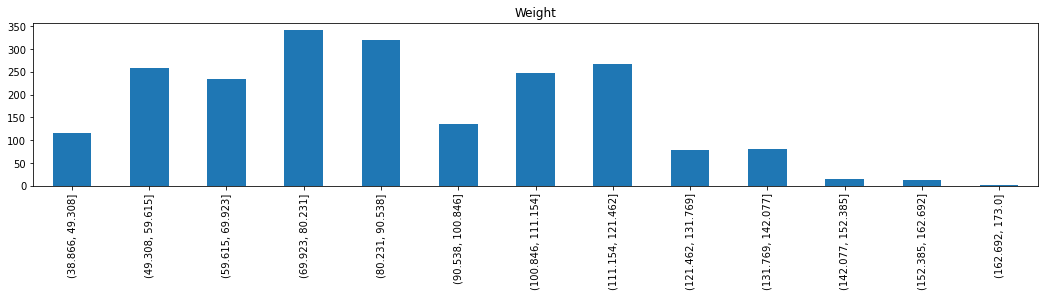

In [23]:
plt.figure(figsize=(18, 3));
pd.cut(dataset["Weight"], 13).value_counts().sort_index().plot.bar();
plt.title("Weight");

Il grafico a barre evidenzia come vi siano relativamente poche persone con un peso molto basso, così come allo stesso tempo vi siano poche persone con un peso molto alto. Si osserva comunque una certa variabilità come osservato anche dal valore ottenuto sulla deviazione standard.

Le osservazioni ottenute dal metodo _describe_ sulle variabili numeriche sono riscontrabili anche mediante istogrammi.

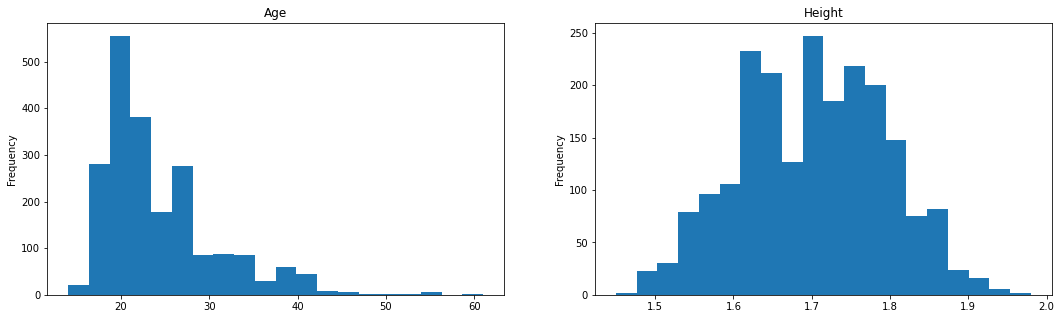

In [24]:
plt.figure(figsize=(18, 5))

dataset["Age"].plot.hist(bins=20, ax=plt.subplot(1, 2, 1))
plt.title("Age");

dataset["Height"].plot.hist(bins=20, ax=plt.subplot(1, 2, 2))
plt.title("Height");

Il grafico che esplicita meglio tutte le informazioni fornite dal metodo _describe_ è un box plot. Lo si vede in merito al peso `Weight`.

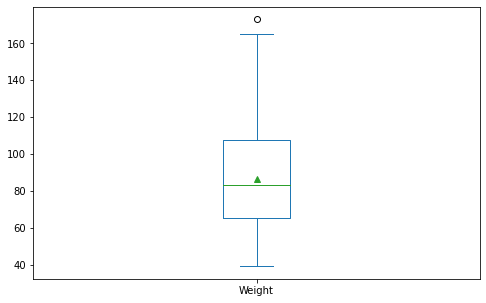

In [25]:
plt.figure(figsize=(8, 5));
dataset["Weight"].plot.box(showmeans=True);

Si verifica inoltre se sussiste una correlazione tra altezza (`Height`) e peso (`Weight`).

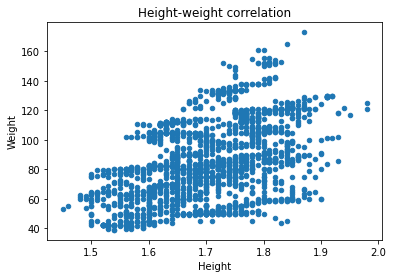

In [26]:
dataset.plot.scatter("Height", "Weight");
plt.title("Height-weight correlation");

Semplicemente dal solo grafico si può affermare come non vi sia una vera e propria correlazione tra altezza e peso. Infatti non è sempre vero che a persone più alte corrisponde anche un peso maggiore: si nota come ad una persona alta 1.90 metri corrisponda un peso di 60 kg.  
Si ha infatti una distribuzione dei dati piuttosto equa e non emerge nessuna correlazione diretta.

Si verifica se sussiste una correlazione tra età (`Age`) e peso (`Weight`).

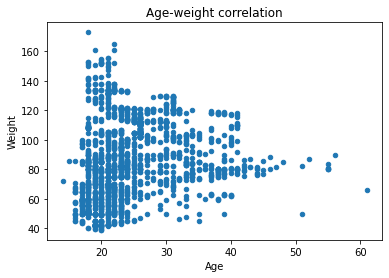

In [27]:
dataset.plot.scatter("Age", "Weight");
plt.title("Age-weight correlation");

Non emerge nemmeno ora una correlazione diretta tra età e peso: questo è dovuto dal fatto che il 75% delle persone hanno un età inferiore a 26 anni. Si ha quindi una bassa distribuzione di valori di età elevati e di conseguenza non emerge il concetto che ad un età maggiore corrisponde un peso maggiore, bensì emerge come nella fascia tra i 20 e i 40 anni vi sia una grande variabilità di pesi possibili.

È possibile verificare empiricamente quanto detto attraverso il calcolo del coefficiente di correlazione di Pearson. Tale coefficiente valuta infatti il grado di correlazione tra due variabili.

In [28]:
age = dataset["Age"].values
height = dataset["Height"].values
weight = dataset["Weight"].values

In [29]:
# Coefficiente di correlazione di Pearson tra età e peso
np.mean((age-age.mean()) * (weight-weight.mean())) / (age.std() * weight.std())

0.203451260438734

Si ottiene un valore abbastanza distante da 1. Ciò indica come effettivamente via sia una correlazione piuttosto debole tra età e peso.  
Si può quindi affermare come non vi sia una significativa correlazione tra le due variabili come si era osservato dal solo grafico.

In [30]:
# Coefficiente di correlazione di Pearson tra altezza e peso
np.mean((height-height.mean()) * (weight-weight.mean())) / (height.std() * weight.std())

0.46226361430075796

Tra altezza e peso si ottiene un valore più significativo, ma che pur sempre non evidenzia una diretta ed una forte correlazione nemmeno tra tali due variabili. É comunque un valore che suggerisce che quando l'altezza aumenta, il peso tende ad aumentare anche esso, ma non in modo perfettamente proporzionale e significativo.  
La relazione tra le variabili può essere considerata moderata.

Si procede ad analizzare le variabili categoriche, partendo dalla distribuzione di individui maschi e individui femmine nel dataset.

In [31]:
dataset["Gender"].value_counts(normalize=True)

Male      0.505921
Female    0.494079
Name: Gender, dtype: float64

Si osserva come i dati raccolti siano suddivisi a metà tra maschi e femmine.  
Un grafico a torta rende visivamente meglio l'idea di tale suddivisione.

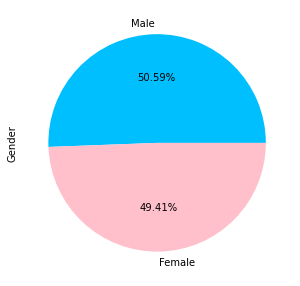

In [32]:
plt.figure(figsize=(8, 5));
dataset["Gender"].value_counts(normalize=True).plot.pie(autopct="%.2f%%", colors=["deepskyblue", "pink"]);

Si precisa di conseguenza che il dataset analizzato contiene dati riguardanti individui con equa distribuzione tra genere maschile e femminile e con un'età compresa tra i 14 e i 61 anni.

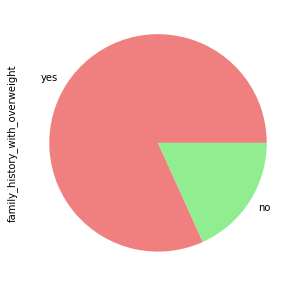

In [33]:
plt.figure(figsize=(8, 5));
dataset["family_history_with_overweight"].value_counts().plot.pie(colors=["lightcoral", "lightgreen"]);

Una grande maggioranza degli individui ha familiari con problemi di sovrappeso.

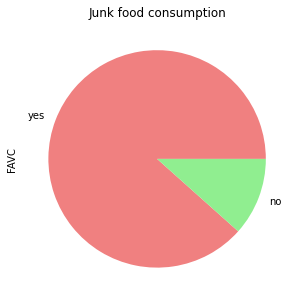

In [34]:
plt.figure(figsize=(8, 5));
dataset["FAVC"].value_counts().plot.pie(colors=["lightcoral", "lightgreen"]);
plt.title("Junk food consumption");

Vi è una grande assunzione di cibi ad alto contenuto calorico ("cibo spazzatura") da parte degli individui.

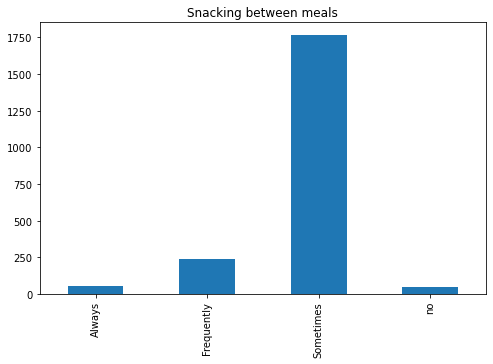

In [35]:
plt.figure(figsize=(8, 5));
dataset["CAEC"].value_counts().sort_index().plot.bar();
plt.title("Snacking between meals");

Non vi è la tendenza di assumere con elevata frequenza cibi al di fuori dei pasti principali: l'assunzione di cibi al di fuori dei pasti principali si presenta prevalentemente qualche volta.

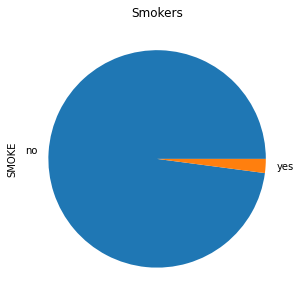

In [36]:
plt.figure(figsize=(8, 5));
dataset["SMOKE"].value_counts().plot.pie();
plt.title("Smokers");

Quasi tutti gli individui non fumano.

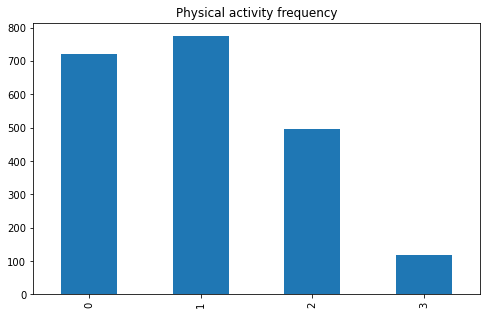

In [37]:
plt.figure(figsize=(8, 5));
dataset["FAF"].value_counts().sort_index().plot.bar();
plt.title("Physical activity frequency");

Si osserva come prevalgano individui che si possono definire poco sportivi: dominano frequenze basse (0 e 1) mentre gli individui che svolgono frequentemente attività fisica (2 e 3) sono in minoranza.

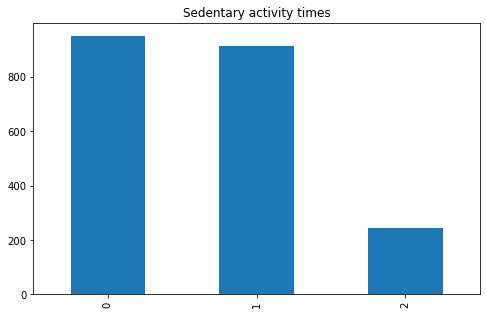

In [38]:
plt.figure(figsize=(8, 5));
dataset["TUE"].value_counts().sort_index().plot.bar();
plt.title("Sedentary activity times");

Non ci sono molti individui che svolgono una vita sedentaria.

Si analizza di seguito la variabile `CALC`, che rappresenta l'assunzione di alcol da parte di una persona.

In [39]:
dataset["CALC"].value_counts()

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64

Si osserva come vi sia un unico valore "Always". Questo valore potrebbe portare ad errori nel momento della valutazione del modello, in quanto unico valore presente nel dataset.  


Inoltre, il valore "Always" potrebbe non fornire molte informazioni utili essendo raro e rappresentando solo una minima parte dei casi. In tal senso, decido ugualmente di utilizzare tale valore all'interno del modello ma aggregandolo ai valori della categoria "Frequently" essendo essa più significativa.  


Prima di procedere con la modifica, si può affermare come l'unico valore "Always" uguale ad 1 sia definibile come un _outlier_. Se lo si volesse verificare graficamente, lo si può vedere con un box plot; sarà necessario convertire i valori categorici in valori numerici.

In [40]:
dataset["CALC"].head(7)

0            no
1     Sometimes
2    Frequently
3    Frequently
4     Sometimes
5     Sometimes
6     Sometimes
Name: CALC, dtype: category
Categories (4, object): ['Always', 'Frequently', 'Sometimes', 'no']

In [41]:
# Dizionario di mapping per conversione in valori numerici
mapping = {
    "no": 0, 
    "Sometimes": 1, 
    "Frequently": 2, 
    "Always": 3
}

# Variabile contenente i soli valori numerici mappati della colonna "CALC"
CALC_values = dataset["CALC"].map(mapping).astype("int64")
CALC_values.head(7)

0    0
1    1
2    2
3    2
4    1
5    1
6    1
Name: CALC, dtype: int64

In [42]:
CALC_values.value_counts()

1    1401
0     639
2      70
3       1
Name: CALC, dtype: int64

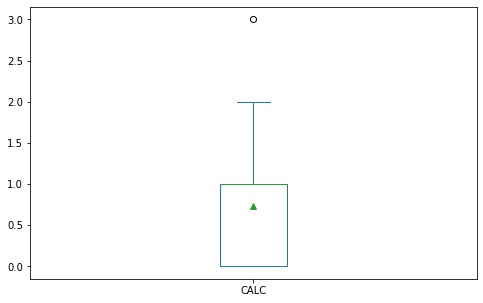

In [43]:
plt.figure(figsize=(8, 5));
CALC_values.plot.box(showmeans=True);

Si verifica tramite al box plot come vi sia un evidente outlier: è unico e corrisponde di fatti all'unico valore "Always" presente nel dataset.

Osservato ciò, decido di applicare la vera e propria modifica al dataset, in particolare nella colonna in questione.

In [44]:
# Modifica sul dataset
dataset.loc[dataset["CALC"] == "Always", "CALC"] = "Frequently"
dataset["CALC"].value_counts()

Sometimes     1401
no             639
Frequently      71
Always           0
Name: CALC, dtype: int64

Poichè a seguito della modifica si ottiene _"Always" = 0_, decido allora di eliminare tale categoria (avendo aggregato il valore "Always" a "Frequently").

In [45]:
# Ri-definizione variabile "CALC": variabile categorica con le 3 sole categorie rimanenti
dataset["CALC"] = pd.Categorical(dataset["CALC"], categories=["Frequently", "Sometimes", "no"])
dataset["CALC"].value_counts()

Sometimes     1401
no             639
Frequently      71
Name: CALC, dtype: int64

In [46]:
dataset["CALC"].dtype

CategoricalDtype(categories=['Frequently', 'Sometimes', 'no'], ordered=False)

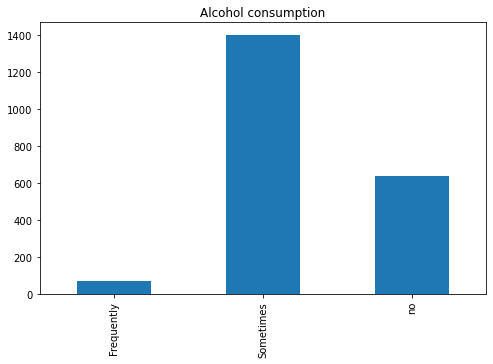

In [47]:
plt.figure(figsize=(8, 5));
dataset["CALC"].value_counts().sort_index().plot.bar();
plt.title("Alcohol consumption");

Fatto ciò, si ridefinisce inoltre la variabile `CALC` nel seguente modo:  
`CALC`: Rappresenta l'assunzione di alcol da parte dell'individuo, espresso nei possibili seguenti valori: "Sometimes", "Frequently" e "no".

Procedendo con l'analisi ... 

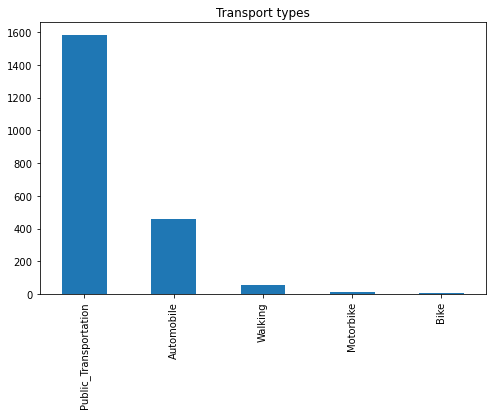

In [48]:
plt.figure(figsize=(8, 5));
dataset["MTRANS"].value_counts().plot.bar();
plt.title("Transport types");

Dal grafico si nota una netta preferenza per il trasporto pubblico e l'automobile.

Si osservano infine i possibili livelli di obesità e la loro distribuzione.

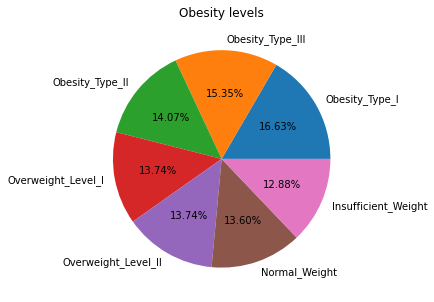

In [49]:
plt.figure(figsize=(8, 5));
dataset["NObeyesdad"].value_counts().plot.pie(autopct="%.2f%%");
plt.title("Obesity levels");
plt.ylabel("");

Vi è un'equa classificazione e distribuzione degli individui tra i vari livelli possibili di obesità (a causa del bilanciamento con filtro SMOTE).

**OSSERVAZIONE**  

Prima di procedere con l'addestramento e la validazione del modello predittivo, è bene fare un'ulteriore precisazione.  
Essendo lo scopo predire il peso di una persona, non è detto che si conosca a priori la classe di obesità a cui appartiene un individuo: la sua classe di obesità potrebbe essere nota a priori, o potrebbe essere definita come conseguenza del valore ottenuto sul peso; tuttavia questa seconda opzione è la più probabile: la classe di obesità, solitamente, è una conseguenza che emerge dal peso di una persona.  
Diviene comunque lecito analizzare entrambi i casi: sia il caso in cui la classe di obesità sia una conseguenza del valore ottenuto sul peso (e che quindi essa non sia conosciuta a priori per la predizione del peso), sia il caso in cui la classe di obesità sia conosciuta a priori.  

Si procede con la iniziale _non considereazione_ della classe di obesità di un individuo e la crezione del relativo modello di predizione.

## Modello predittivo _senza_ la conoscenza della classe di obesità dell'individuo.

**Iniziale analisi esplorativa per realizzazione modello**

Facendo una distinzione totale e completa delle variabili del dataset, si distinguono variabili: 
- numeriche
- categoriche ordinali
- categoriche nominali 

Tuttavia le variabili categoriche ordinali e categoriche nominali possono essere considerate assieme come generiche variabili categoriche.  
Si può quindi dire che si distinguono:
- variabili numeriche
- variabili categoriche

In [50]:
numeric_vars = ["Age", "Height"]
categorical_vars = ["Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC",
                    "FCVC", "NCP", "CAEC", "CH2O", "FAF", "TUE", "CALC", "MTRANS"]

Si precisa che anche la variabile `Weight` è una variabile numerica. Tuttavia essa sarà quella che ci si prefigge di predire attraverso la creazione di un modello di regressione e quindi non sarà considerata: è la variabile target.  
Allo stesso tempo si precisa che anche la variabile `NObeyesdad` è una variabile categorica. Tuttavia tale variabile sarà considerata solo in un secondo momento come spiegato e anticipato in precedenza.

In [51]:
# Importazione librerie necessarie per addestramento e validazione del modello predittivo
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error 

Di seguito si suddivide il dataset in training set e validation set prima di procedere.

In [52]:
X = dataset.drop(columns=["Weight", "NObeyesdad"])  # Features
y = dataset["Weight"]                               # Target

# Training set (70%) e validation set (30%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

Si definisce inoltre una funzione che abbia lo scopo di calcolare le metriche di valutazione dei vari modelli di regressione.

In [53]:
# Funzioni per valutazione modelli
pd.options.display.float_format = "{:.6f}".format

def relative_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def model_performance(X, y, model):
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    re = relative_error(y, y_pred)
    print("R²:", r2)
    print("MSE:", mse)
    print(f"Relative error: {re:.3f}%")

L'obiettivo è quindi prevedere il peso di un individuo senza conoscerne la classe di obesità.

In [54]:
X_train.head()

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
1930,Female,26,1.630000,yes,yes,3,3,Sometimes,no,1,no,0,1,Sometimes,Public_Transportation
1803,Female,26,1.660000,yes,yes,3,3,Sometimes,no,3,no,0,0,Sometimes,Public_Transportation
1198,Male,18,1.750000,yes,yes,3,3,Sometimes,no,3,no,1,0,Sometimes,Public_Transportation
15,Female,22,1.700000,yes,no,3,3,Always,no,2,yes,2,1,Sometimes,Public_Transportation
816,Male,23,1.670000,yes,yes,2,3,Sometimes,no,2,no,0,2,Sometimes,Public_Transportation


Anzitutto, dall'analisi effettuata precedentemente, si è osservato come vi fosse una relazione non del tutto lineare tra altezza (`Height`) e peso (`Weight`). Tant'è che dal calcolo del coefficiente di correlazione di Pearson si evidenziava una moderata correlazione lineare tra le due variabili.  
Dimostriamo quindi quanto osservato precedentemente: un modello lineare creato sulla sola conoscenza dell'altezza di un individuo non permetterà di ottenere un buon modello per predire il peso.

In [55]:
X_train_trial = X_train[["Height"]]
X_val_trial = X_val[["Height"]]

In [56]:
model = LinearRegression()
model.fit(X_train_trial, y_train)

LinearRegression()

In [57]:
model_performance(X_val_trial, y_val, model)

R²: 0.22004995377640613
MSE: 557.8503496657396
Relative error: 25.681%


Dal risultato ottenuto dalle metriche di performance si ha un'idea di quanto il modello sia in grado di adattarsi ai dati e di quanto sia preciso nelle sue previsioni: i risultati indicano che il modello non si adatta bene e ha una precisione relativamente bassa.

Si procede quindi a creare un primo modello in cui si utilizzano le sole variabili numeriche.  
Si utilizza un modello di regressione lineare Ridge essendo particolarmente utile quando si lavora con dataset che hanno diverse variabili, poichè applica una regolarizzazione (L2) che aiuta a controllare la complessità del modello e a mitigare l'effetto dell'overfitting.

In [58]:
X_train_num = X_train[numeric_vars]
X_val_num = X_val[numeric_vars]

In [59]:
X_train_num.head()

,Age,Height
1930,26,1.630000
1803,26,1.660000
1198,18,1.750000
15,22,1.700000
816,23,1.670000


In [60]:
model = Ridge(alpha=1)
model.fit(X_train_num, y_train)
model_performance(X_val_num, y_val, model)

R²: 0.26679132716228526
MSE: 524.4191169689541
Relative error: 24.137%


Si applica di seguito anche la standardizzazione delle variabili.

In [61]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("regr", Ridge(alpha=1))
])
model.fit(X_train_num, y_train)
model_performance(X_val_num, y_val, model)

R²: 0.26916343766902606
MSE: 522.7224920606817
Relative error: 24.011%


Il modello di regressione lineare con regolarizzazione ha una capacità di spiegazione piuttosto limitata rispetto ai dati di validazione. Solo circa il 27% della variabilità della variabile target (`Weight`) può essere spiegata dalle features utilizzate nel modello e allo stesso tempo un valore così elevato per l'MSE indica come il modello, di fatti, produca previsioni lontane da quelli che sono i valori reali.
Si nota inoltre che anche l'influenza dalla standardizzazione è minima per il modello.

A questo punto si possono fare le seguenti due osservazioni:
1. Il modello di regressione lineare con regolarizzazione non è in grado di spiegare con effetto significativo la variabile target: potrebbero esserci relazioni non lineari tra le variabili numeriche.
2. Il solo utilizzo delle features numeriche potrebbe essere limitante per la validazione di un valido modello.


Si prosegue testando se un modello di regressione polinomiale permette di ottenere un modello migliore, essendo esso in grado di catturare le relazioni non lineari tra le features e la variabile target.  
È bene ricordare infatti come tra le variabili numeriche non vi fosse una forte correlazione lineare come avevamo dimostrato precedentemente attraverso la realizzazione di scatter plot tra `Age` e `Weight` e tra `Height` e `Weight`, ma anche attraverso il calcolo del coefficiente di correlazione di Pearson. Questo ci fa portare all'esplorazione di modelli più avanzati, come la regressione polinomiale, per catturare eventuali relazioni più complesse e non lineari tra le variabili.

In [62]:
model = Pipeline([
    ("poly", PolynomialFeatures(degree=3, include_bias=False)),
    ("scaler", StandardScaler()),
    ("regr", Ridge(alpha=1))
])
model.fit(X_train_num, y_train)
model_performance(X_val_num, y_val, model)

R²: 0.3291429587978777
MSE: 479.8228256057337
Relative error: 22.787%


Si può notare che il modello di regressione polinomiale ha ottenuto un punteggio di accuratezza R² leggermente maggiore rispetto al modello di regressione lineare. Anche l'MSE e l'errore relativo dimostrano un piccolo miglioramento. Questo suggerisce che il modello di regressione polinomiale è in grado di spiegare una maggiore percentuale della variabilità presente nei dati rispetto al modello lineare, ossia che il modello è in grado di catturare meglio le relazioni non lineari tra le variabili numeriche rispetto al modello lineare (che aveva un punteggio R² inferiore).  
Tuttavia, entrambi i valori di R² sono relativamente bassi. Questo potrebbe indicare che le sole variabili numeriche (`Age` e `Height`) non sono sufficienti per creare un modello di predizione accurato sul peso (`Weight`).  
Si deduce, quindi, come i risultati ottenuti siano dovuti dalla non considerazione delle variabili categoriche nel modello, le quali potrebbero avere un impatto maggiore sulla variabile target.  
Prima di includere tali ulteriori features (le variabili categoriche) assieme a quelle già esaminate (le variabili numeriche), si esamina l'importanza delle sole restanti variabili, ossia si analizza l'influenza delle variabili categoriche nel modello.

In [63]:
X_train_cat = X_train[categorical_vars]
X_val_cat = X_val[categorical_vars]

In [64]:
X_train_cat.head()

,Gender,family_history_with_overweight,FAVC,SMOKE,SCC,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS
1930,Female,yes,yes,no,no,3,3,Sometimes,1,0,1,Sometimes,Public_Transportation
1803,Female,yes,yes,no,no,3,3,Sometimes,3,0,0,Sometimes,Public_Transportation
1198,Male,yes,yes,no,no,3,3,Sometimes,3,1,0,Sometimes,Public_Transportation
15,Female,yes,no,no,yes,3,3,Always,2,2,1,Sometimes,Public_Transportation
816,Male,yes,yes,no,no,2,3,Sometimes,2,0,2,Sometimes,Public_Transportation


In [65]:
model = Pipeline([
    ("encoder", OneHotEncoder()),
    ("regr", Ridge(alpha=1))
])
model.fit(X_train_cat, y_train)
model_performance(X_val_cat, y_val, model)

R²: 0.5126782853566113
MSE: 348.5512825209683
Relative error: 18.723%


- Si ottiene un valore di accuratezza R² superiore rispetto a quello derivante dall'uso esclusivo delle variabili numeriche. Questo risultato suggerisce chiaramente l'importanza di tali variabili nella predizione del peso.  
- Si ottiene un valore più basso per l'MSE (nonostante sia comunque piuttosto elevato) rispetto a quello derivante dall'uso esclusivo delle variabili numeriche, il quale indica come il modello stia migliorando nelle sue previsioni, avvicinandosi ai valori reali.
- L'errore relativo pari al 18.7% conferma il miglioramento osservato dai due precedenti risultati di R² e MSE.
- All'interno del dataset, le variabili categoriche emergono come predominanti nel numero (sono 13 non considerando il livello di obesità), dimostrando un potenziale livello di significatività superiore rispetto alle variabili numeriche. Questo andrà comunque dimostrato e verificato in seguito.
- Le variabili categoriche riescono a spiegare una parte moderata della variabilità presente nella variabile target.

**Creazione del modello**  

Si procede infine con l'inclusione di entrambe le tipologie di variabili nel modello (e quindi tutte le possibili variabili): sia le variabili numeriche, sia le variabili categoriche.    
Notare inoltre che in questo primo momento non si applica la regressione polinomiale per le variabili numeriche nonostante si fosse osservato precedentemente come essa potesse portare alla realizzazione di un modello migliore, essendo in grado di catturare le relazioni non linari.

In [66]:
model_1 = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric", StandardScaler(), numeric_vars),
        ("categorical", OneHotEncoder(), categorical_vars)
    ])),
    ("regr", Ridge(alpha=1))
])
model_1.fit(X_train, y_train)
model_performance(X_val, y_val, model_1)

R²: 0.6027744859759556
MSE: 284.11100552834745
Relative error: 17.354%


Dai valori ottenuti dalle metriche di valutazione del modello, si comprende come si sia ottenuto un modello migliore rispetto ai precedenti. Infatti, considerando sia le variabili numeriche e sia le variabili categoriche, si ha una migliore capacità predittiva del modello.

Visualizziamo i coefficienti del modello in un dataframe, dove in ogni riga abbiamo i possibili valori di ogni variabile con un relativo coefficiente.

In [67]:
all_feature_names = np.r_[
    numeric_vars,
    model_1.named_steps["preproc"].named_transformers_["categorical"].get_feature_names(categorical_vars),
].tolist()

In [68]:
pd.DataFrame({
    "scaled_and_ridge": model_1.named_steps["regr"].coef_
}, index=all_feature_names).sort_values("scaled_and_ridge", ascending=False)

,scaled_and_ridge
Height,11.031418
family_history_with_overweight_yes,9.074727
CAEC_no,7.568082
FCVC_3,6.119705
CAEC_Sometimes,5.956328
Age,5.889371
NCP_3,4.978639
CALC_Sometimes,4.843534
MTRANS_Public_Transportation,4.836442
MTRANS_Motorbike,3.598157


In [69]:
scaled_and_ridge = pd.Series(model_1.named_steps["regr"].coef_, index=all_feature_names).sort_values(ascending=False)

Dai risultati ottenuti per ciascun possibile valore relativo a ciascuna possibile variabile, si osservano quali sono i valori che influiscono positivamente e negativamente nella predizione del peso.  
In particolare, influiscono positivamente:
- `Height`, l'altezza,
- `family_history_with_overweight_yes`, la presenza di almeno un familiare in sovrappeso,
- `CAEC_no`, il non consumo di cibo al di fuori dei pasti,
- `FCVC_3`, l'assunzione di molte verdure nei pasti,
- `CAEC_Sometimes`, l'assunzione occasionale di cibo al di fuori dei pasti, 
- `Age`, l'età.  

dove i relativi coefficienti positivi indicano che a tali variabili predittive è associato un aumento nella variabile target (il peso dell'individuo). In particolare, l'altezza (`Height`) ha un coefficiente positivo elevato, indicando che le persone più alte tendono a pesare di più. Tale discorso è valido anche per l'età (`Age`) ma già in modo più moderato se comparato con l'altezza.

Influiscono, invece, negativamente:
- `CAEC_Frequently`, la frequente assunzione di cibo al di fuori dei pasti,
- `family_history_with_overweight_no`, l'assenza di un familiare in sovrappeso,
- `NCP_4`, l'assunzione di diversi pasti consumati giornalmente,
- `MTRANS_Automobile`, la scelta dell'automobile come mezzo di trasporto principale,
- `MTRANS_Walking`, l'andare a piedi come mezzo di trasporto principale,
- `FAF_3`, la frequente attività fisica durante la settimana.  


dove i relativi coefficienti negativi indicano che a tali variabili predittive è associato a una diminuzione nella variabile target (peso dell'individuo). Quindi a tali valori, corrispondono valori più bassi per il peso.

Si individuano infine anche alcune variabili ininfluenti come:
- `TUE_0`, l'assenza di tempo dedicato ad attività sedentarie,
- `SMOKE_no`, l'essere non fumatore.  


Questo suggerisce che queste ultime variabili potrebbero avere un impatto relativamente limitato sulla previsione del peso.  
Si prosegue quindi applicando la regressione Lasso, che ignora i termini meno rilevanti per la predizione (comportando quindi anche una semplificazione del modello), con lo scopo di verificare se si hanno miglioramenti nella predizione.

In [70]:
model_2 = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric", StandardScaler(), numeric_vars),
        ("categorical", OneHotEncoder(), categorical_vars)
    ])),
    ("regr", Lasso(alpha=0.1))
])
model_2.fit(X_train, y_train)
model_performance(X_val, y_val, model_2)

R²: 0.6038068644131307
MSE: 283.37260865927357
Relative error: 17.329%


Si ha un lieve miglioramento con un modello Lasso. Analizziamone quindi i coefficienti con tanto di rappresentazione grafica.

In [71]:
scaled_and_lasso = pd.Series(model_2.named_steps["regr"].coef_, index=all_feature_names).sort_values(ascending=False)
coefficients = scaled_and_lasso

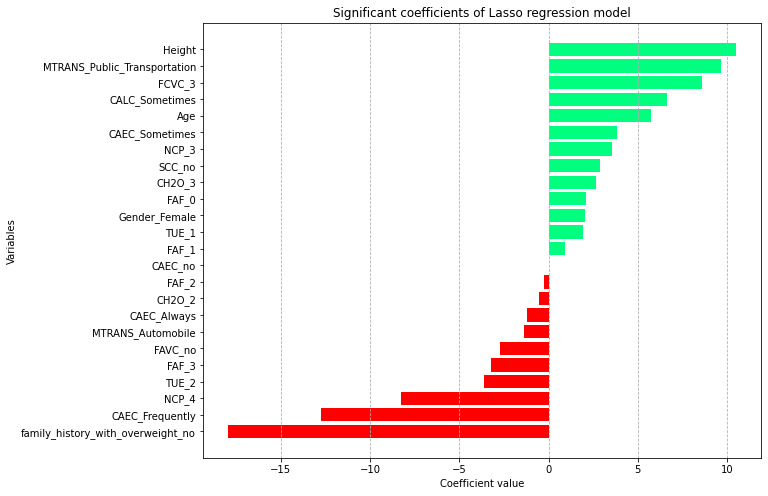

In [72]:
# Soglia minima per considerare un coefficiente significativo
threshold = 0.009
significant_coefficients = coefficients[abs(coefficients) > threshold]
significant_feature_names = significant_coefficients.index
significant_importance_values = significant_coefficients.values

plt.figure(figsize=(10, 8))
plt.barh(significant_feature_names, significant_importance_values, 
         color=["springgreen" if val > threshold else "red" 
                for val in significant_importance_values])
plt.xlabel("Coefficient value")
plt.ylabel("Variables")
plt.title("Significant coefficients of Lasso regression model")
plt.grid(axis="x", linestyle="--")
plt.gca().invert_yaxis()

Prima di effettuare osservazioni, si effettua anche un confronto con i risultati ottenuti dal modello precedente.

In [73]:
pd.DataFrame({
    "scaled_and_lasso": model_2.named_steps["regr"].coef_,
    "scaled_and_ridge": model_1.named_steps["regr"].coef_,
}, index=all_feature_names).sort_values("scaled_and_lasso", ascending=False)

,scaled_and_lasso,scaled_and_ridge
Height,10.484009,11.031418
MTRANS_Public_Transportation,9.635602,4.836442
FCVC_3,8.619366,6.119705
CALC_Sometimes,6.630346,4.843534
Age,5.732824,5.889371
CAEC_Sometimes,3.852553,5.956328
NCP_3,3.535872,4.978639
SCC_no,2.866938,2.403594
CH2O_3,2.684021,2.085759
FAF_0,2.110585,2.970778


Come si può osservare, la regressione Lasso ha la capacità di selezionare automaticamente un sottoinsieme di variabili più significative ed influenti per la predizione, escludendo quelle che hanno un impatto minore o addirittura nullo e la dimostrazione ne è la seguente.

In [74]:
print("Numero variabili:", len(all_feature_names))
print("Numero variabili ininfluenti:", (len(all_feature_names) - len(significant_feature_names)))
print("Numero variabili significative:", len(significant_feature_names))

Numero variabili: 41
Numero variabili ininfluenti: 17
Numero variabili significative: 24


Il modello (basato sulla regressione Lasso) tiene conto delle sole variabili che hanno maggior impatto nella predizione, grazie al suo meccanismo di penalizzazione e selezione automatica delle variabili.
Tant'è che molte più variabili sono ininfluenti nel modello: oltre a `TUE_0` (l'assenza di tempo dedicato ad attività sedentarie) e `SMOKE_no` (l'essere non fumatore), che si era notato esserlo già, ora il modello ne aggiunge delle ulteriori come per esempio:
- `MTRANS_Walking`, l'andare a piedi come mezzo di trasporto principale, 
- `FCVC_1`, il basso numero di pasti in cui si assumono verdure,
- `CH2O_1`, la poca assunzione di acqua,
- `MTRANS_Bike`, la bicicletta come mezzo di trasporto principale,  

e addirittura anche la presenza di un familiare in sovrappeso (`family_history_with_overweight_yes`) diviene un'informazione ininfluente per tale modello, mentre in precedenza veniva definita come una variabile che incideva positivamente sulla predizione di un alto peso.  
Il medesimo discorso vale anche per l'andare a piedi come mezzo di trasporto principale (`MTRANS_Walking`), che nel modello precedente era definito come una variabile che incideva negativamente nella predizione del peso, ossia tendeva a predire un peso più basso.  


Inoltre si osserva anche una ridistribuzione dei pesi delle variabili. Possiamo di fatti affermare che, per esempio, oltre l'altezza (`Height`), l'età (`Age`) e l'assunzione di molte verdure nei pasti (`FCVC_3`), anche:
- `MTRANS_Public_Transportation`, il trasporto pubblico come mezzo di trasporto principale,
- `CALC_Sometimes`, l'assunzione occasionale di alcol,   

incidono positivamente nella predizione del peso: predirrano pesi più elevati.  

### Test di diversi modelli di regressione: grid search per miglior modello e miglior iperparametri

Come successivo step ci si pone l'obiettivo di ricercare e individuare il modello predittivo migliore: si vogliono identificare quali iperparametri e quali aspetti sono determinanti per creare un buon modello.  
Si verifica con una grid search quali sono le migliori scelte e le migliori considerazioni da attuare per ottenere il miglior modello possibile tra i seguenti possibili: Ridge, Lasso, Elastic Net.   
Inoltre, si analizzano i seguenti aspetti:
- utilizzo della standardizzazione o meno per le variabili numeriche.
- generazione di features polinomiali o meno per le variabili numeriche, con lo scopo di catturare le relazioni non lineari. Si considerano i seguenti gradi delle features polinomiali: 
     - grado 1 (nessuna feature polinomiale), 
     - grado 2 (features polinomiali di secondo grado), 
     - grado 3 (features polinomiali di terzo grado).  
- Eliminazione o meno di una delle colonne generate dal one-hot encoding per evitare il problema della multi-collinearità.
- Possibili scelte di valori per gli iperparametri relativi all'intensità di regolarizzazione al dipendere del modello.

In [75]:
from sklearn.model_selection import GridSearchCV, KFold
import warnings

# Ignoro i warning relativi alla mancata convergenza di un minimo della funzione obiettivo entro un certo numero di iterazioni.
warnings.filterwarnings("ignore", category=Warning)

model = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric",  Pipeline([
            ("scaler", None),
            ("poly", PolynomialFeatures(include_bias=False))
        ]), numeric_vars),
        ("categorical", OneHotEncoder(), categorical_vars)
    ])),
    ("regr", None)
])

# Grid search su scelte preprocessing e scelta modello
grid = [
    { # scelte preprocessing + Ridge
        "preproc__numeric__scaler": ["passthrough", StandardScaler()],
        "preproc__numeric__poly__degree": [1, 2, 3],
        "preproc__categorical__drop": [None, "first"],
        "regr": [Ridge()],
        "regr__alpha": [0.1, 1.0, 10.0] 
    },
    { # scelte preprocessing + Lasso
        "preproc__numeric__scaler": ["passthrough", StandardScaler()],
        "preproc__numeric__poly__degree": [1, 2, 3],
        "preproc__categorical__drop": [None, "first"],
        "regr": [Lasso()],
        "regr__alpha": [0.1, 1.0, 10.0] 
    },
    { # scelte preprocessing + Elastic Net
        "preproc__numeric__scaler": ["passthrough", StandardScaler()],
        "preproc__numeric__poly__degree": [1, 2, 3],
        "preproc__categorical__drop": [None, "first"],
        "regr": [ElasticNet()],
        "regr__alpha": [0.1, 1.0],
        "regr__l1_ratio": [0.1, 0.2, 0.5, 0.7, 0.9, 1]
    }
]

kf = KFold(3, shuffle=True, random_state=42)
gs = GridSearchCV(model, grid, cv=kf, scoring="r2")
gs.fit(X_train, y_train)
print("Migliori parametri:", gs.best_params_)

Migliori parametri: {'preproc__categorical__drop': 'first', 'preproc__numeric__poly__degree': 3, 'preproc__numeric__scaler': StandardScaler(), 'regr': Lasso(alpha=0.1), 'regr__alpha': 0.1}


In [76]:
model_performance(X_val, y_val, gs)

R²: 0.6168017266093406
MSE: 274.07818210578677
Relative error: 16.726%


In [77]:
pd.DataFrame(gs.cv_results_).sort_values("mean_test_score", ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preproc__categorical__drop,param_preproc__numeric__poly__degree,param_preproc__numeric__scaler,param_regr,param_regr__alpha,param_regr__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
69,0.027027,0.003943,0.011022,0.004272,first,3,StandardScaler(),Lasso(alpha=0.1),0.100000,NaN,"{'preproc__categorical__drop': 'first', 'prepr...",0.598818,0.569153,0.630082,0.599351,0.024877,1
209,0.021818,0.002045,0.008791,0.001004,first,3,StandardScaler(),ElasticNet(),0.100000,1,"{'preproc__categorical__drop': 'first', 'prepr...",0.598818,0.569153,0.630082,0.599351,0.024877,1
208,0.023645,0.001551,0.010365,0.000892,first,3,StandardScaler(),ElasticNet(),0.100000,0.900000,"{'preproc__categorical__drop': 'first', 'prepr...",0.600808,0.569099,0.627831,0.599246,0.024003,3
32,0.021238,0.002988,0.008446,0.000472,first,3,passthrough,Ridge(),10.000000,NaN,"{'preproc__categorical__drop': 'first', 'prepr...",0.592822,0.573506,0.631224,0.599184,0.023989,4
196,0.035123,0.001291,0.009271,0.000896,first,3,passthrough,ElasticNet(),0.100000,0.900000,"{'preproc__categorical__drop': 'first', 'prepr...",0.596342,0.572015,0.628579,0.598979,0.023168,5


Si nota quindi come un modello di regressione Lasso, che ignora le variabili meno rilevanti, sia il modello migliore per la predizione del peso: le variabili che hanno poca importanza nella predizione del peso non vengono selezionate e per capire quali siano queste variabili è sufficiente consultarne i coefficienti del modello.  
Tuttavia si può comunque affermare che la differenza sulla scelta del modello è veramente minima e sottile: i risultati relativi alla valutazione dei modelli si discostano di poco.

In [78]:
# Scrittura esplicita del migliore modello individuato
model = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric",  Pipeline([
            ("scaler", StandardScaler()),
            ("poly", PolynomialFeatures(include_bias=False, degree=3))
        ]), numeric_vars),
        ("categorical", OneHotEncoder(drop="first"), categorical_vars)
    ])),
    ("regr", Lasso(alpha=0.1))
])
model.fit(X_train, y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False))]),
                                                  ['Age', 'Height']),
                                                 ('categorical',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                

In [79]:
feature_names_gs = np.r_[
    model.named_steps["preproc"].named_transformers_["numeric"].named_steps["poly"].get_feature_names(numeric_vars),
    model.named_steps["preproc"].named_transformers_["categorical"].get_feature_names(categorical_vars),
].tolist()

In [80]:
pd.DataFrame({
    "Coefficient": model.named_steps["regr"].coef_}, 
index=feature_names_gs).sort_values("Coefficient", ascending=False)

,Coefficient
family_history_with_overweight_yes,16.313991
Height,12.062721
MTRANS_Public_Transportation,9.291347
Age,9.115045
FCVC_3,7.629025
CALC_Sometimes,5.261465
CAEC_Sometimes,4.461987
NCP_3,3.455543
FAVC_yes,2.625990
CH2O_3,2.374238


Tuttavia quello che si osserva è che sono assenti alcune variabili. Infatti, il numero inferiore di variabili è causato dall'iperparametro `drop="first"` che rimuove una categoria delle variabili categoriche.  
Lo si può vedere dai successivi risultati.

In [81]:
print("Numero variabili nel miglior modello:", len(feature_names_gs))
print("Nomi variabili:", feature_names_gs)

Numero variabili nel miglior modello: 35
Nomi variabili: ['Age', 'Height', 'Age^2', 'Age Height', 'Height^2', 'Age^3', 'Age^2 Height', 'Age Height^2', 'Height^3', 'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes', 'SMOKE_yes', 'SCC_yes', 'FCVC_2', 'FCVC_3', 'NCP_2', 'NCP_3', 'NCP_4', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'CH2O_2', 'CH2O_3', 'FAF_1', 'FAF_2', 'FAF_3', 'TUE_1', 'TUE_2', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking']


Nel momento dell'analisi dei coefficienti, però, è bene analizzare anche tali variabili che sono state eliminate a causa dell'iperparametro `drop="first"` del one-hot encoder. Infatti, anche se queste non sono esplicitamente incluse nel modello a causa del valore dell'iperparametro che ha lo scopo di evitarne la multicollinearità, il loro impatto può essere compreso attraverso l'analisi dei coefficienti del modello.  
Si riscrive di seguito il modello nel quale non si ha alcuna eliminazione delle variabili, considerando quindi l'impatto di tutte le variabili per avere una visione completa dell'effetto complessivo di esse sul target del modello di regressione.

In [82]:
model = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric",  Pipeline([
            ("scaler", StandardScaler()),
            ("poly", PolynomialFeatures(include_bias=False, degree=3))
        ]), numeric_vars),
        ("categorical", OneHotEncoder(drop=None), categorical_vars)
    ])),
    ("regr", Lasso(alpha=0.1))
])
model.fit(X_train, y_train)

all_feature_names_total = np.r_[
    model.named_steps["preproc"].named_transformers_["numeric"].named_steps["poly"].get_feature_names(numeric_vars),
    model.named_steps["preproc"].named_transformers_["categorical"].get_feature_names(categorical_vars),
].tolist()

pd.DataFrame({
    "Coefficient_best_model": model.named_steps["regr"].coef_}, 
index=all_feature_names_total).sort_values("Coefficient_best_model", ascending=False)

,Coefficient_best_model
Height,12.140715
Age,9.292919
MTRANS_Public_Transportation,7.684829
FCVC_3,7.572034
CALC_Sometimes,5.215925
CAEC_Sometimes,4.454206
Gender_Female,4.010886
NCP_3,3.465446
CH2O_3,2.389787
TUE_1,1.977080


In [83]:
print("Numero totale delle variabili:", len(all_feature_names_total))

Numero totale delle variabili: 48


In [84]:
coefficients_best_model = pd.Series(model.named_steps["regr"].coef_, index=all_feature_names_total).sort_values(ascending=False)
best_coefficients = coefficients_best_model

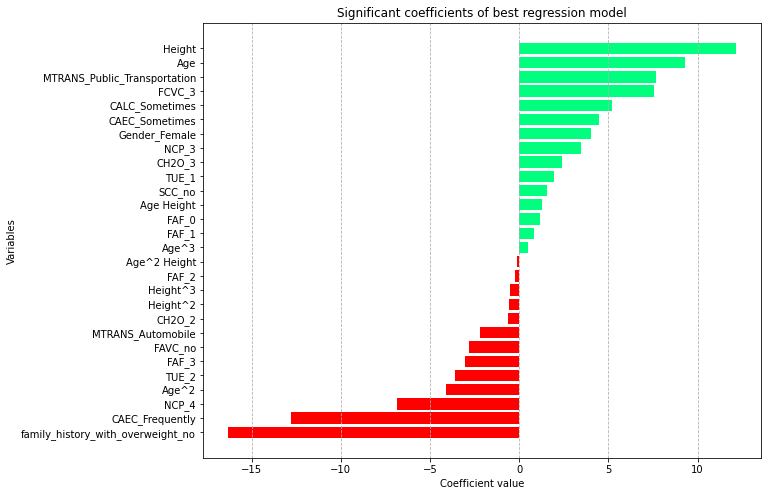

In [85]:
# Soglia minima per considerare un coefficiente significativo
threshold = 0.009
significant_best_coefficients = best_coefficients[abs(best_coefficients) > threshold]
significant_best_feature_names = significant_best_coefficients.index
significant_best_importance_values = significant_best_coefficients.values

plt.figure(figsize=(10, 8))
plt.barh(significant_best_feature_names, significant_best_importance_values, 
         color=["springgreen" if val > threshold else "red" 
                for val in significant_best_importance_values])
plt.xlabel("Coefficient value")
plt.ylabel("Variables")
plt.title("Significant coefficients of best regression model")
plt.grid(axis="x", linestyle="--")
plt.gca().invert_yaxis()

A seguito della realizzazione del modello, dimostrato essere il modello migliore (tramite grid search) per la predizione del peso, si può concludere con le seguenti osservazioni.  
Vi sono diverse variabili che non vengono considerate nella predizione poichè considerate irrilevanti. Alcune di esse sono:
- `MTRANS_Walking`, l'andare a piedi come mezzo di trasporto principale,
- `MTRANS_Bike`, l'utilizzo dellla bici come mezzo di trasporto principale,
- `family_history_with_overweight_yes`, la presenza di almeno un familiare in sovrappeso,
- `SMOKE_yes`, l'essere un fumatore,
- `SMOKE_no`, l'essere un non-fumatore,
- `FAVC_yes`, l'assunzione di cibi ad alto contenuto energetico.   

Le variabili che vengono considerate positivamente per la predizione del peso sono:

In [86]:
best_coefficients.index[:6].tolist()

['Height',
 'Age',
 'MTRANS_Public_Transportation',
 'FCVC_3',
 'CALC_Sometimes',
 'CAEC_Sometimes']

Ossia: 
- `Height`, l'altezza,
- `Age`, l'età,
- `MTRANS_Public_Transportation`, il trasporto pubblico come mezzo di trasporto principale.
- `FCVC_3`, l'assunzione di molte verdure nei pasti,
- `CALC_Sometimes`, l'assunzione non frequente di alcol,
- `CAEC_Sometimes`, il non-frequente consumo di cibi al di fuori dei pasti principali.  

Dove, in particolare, ad un maggior valore di altezza ed età corrisponderanno valori di peso maggiore.

Al contrario, le variabili che vengono considerate negativamente per la predizione del peso sono:

In [87]:
best_coefficients.index[-6:].tolist()

['FAF_3',
 'TUE_2',
 'Age^2',
 'NCP_4',
 'CAEC_Frequently',
 'family_history_with_overweight_no']

Ossia: 
- `FAF_3`, la frequente attività fisica durante la settimana,
- `TUE_2`, il diverso tempo dedicato ad attività sedentarie,
- `Age^2`, l'elevamento a seconda dell'età,
- `NCP_4`, l'assunzione di diversi pasti all'interno della giornata,
- `CAEC_Frequently`, l'assunzione frequente di cibo al di fuori dei pasti principali,
- `family_history_with_overweight_no`, l'assenza di un familiare in sovrappeso.

Possiamo quindi fare le seguenti considerazioni finali sul modello:  

1. **Migliori parametri:** I migliori parametri identificati dalla grid search per il modello sono:
   - Per le variabili numeriche: standardizzazione e generazione di features polinomiali di grado 3.
   - Per le variabili categoriche: drop della prima colonna dopo one-hot encoding.
   - Per la scelta del modello: modello Lasso con alpha pari a 0.1, quindi applicazione di una regolarizzazione relativamente bassa.  
   
   
2. **Moderata capacità predittiva:** Il modello ottenuto ha una capacità predittiva ragionevole. Il valore di R² vicino a 0.62 indica come il modello abbia una certa utilità nella predizione della variabile target (`Weight`), suggerendo però allo stesso tempo come non sia in grado di effettuare previsioni molto precise sul peso basandosi sulle sole features fornite.  


3. **Scelte di preprocessing:** La scelta di standardizzare le variabili numeriche e la generazione di features polinomiali con grado 3 sembra essere la scelta migliore per il modello, in quanto ha portato a prestazioni migliori. Inoltre, la decisione di eliminare la prima colonna dopo il one-hot encoding per le variabili categoriche sembra essere utile, probabilmente per evitare il problema della multi-collinearità tra le variabili.

Avendo comunque ottenuto modelli simili in termini di performance, ne si analizza l'intersezione dei fattori più rilevanti (sia in positivo che in negativo) comuni in ciascun modello creato, con lo scopo di individuare se in tali modelli vi sono variabili che si possono definire fondamentali e comuni per la predizione del peso.

In [88]:
serie1 = pd.concat([scaled_and_ridge.head(6), scaled_and_ridge.tail(6)])
serie2 = pd.concat([scaled_and_lasso.head(6), scaled_and_lasso.tail(6)])
serie3 = pd.concat([coefficients_best_model.head(6), coefficients_best_model.tail(6)])

serie1_names = set(serie1.index)
serie2_names = set(serie2.index)
serie3_names = set(serie3.index)

intersection_names = serie1_names & serie2_names & serie3_names
intersection_names

{'Age',
 'CAEC_Frequently',
 'CAEC_Sometimes',
 'FAF_3',
 'FCVC_3',
 'Height',
 'NCP_4',
 'family_history_with_overweight_no'}

Si conclude osservando come l'età (`Age`) e l'altezza (`Height`), ossia le uniche due variabili numeriche riguardanti le caratteristiche fisiche di un individuo all'interno del dataset, siano fattori definiti come rilevanti in ciascuno dei modelli osservati.  
Inoltre sono rilevanti anche delle abitudini alimentari dell'individuo: l'assunzione di molte verdure nei pasti (`FCVC_3`) e l'assunzione frequente e non frequente di alcol (rispettivamente `CALC_Frequently` e `CALC_Sometimes`).  
Infine, per quanto riguarda lo stile di vita, emerge come sia importante l'elevata frequenza di attività fisica (`FAF_3`).  
È importante considerare anche se l'utente non possiede/possedeva familiari in sovrappeso (`family_history_with_overweight_no`).

### Modello con alberi decisionali
**Premesse e precisazioni**  

Si prosegue analizzando un altro modello di regressione basato sugli alberi decisionali: si parlerà quindi di alberi di regressione.  
Una caratteristica intrinseca di questi modelli è la loro capacità di catturare relazioni non lineari tra le features e la variabile target. Quindi, la ragione per cui si analizza tale modello applicato a tale contesto è dovuta dal fatto che esso permetterà di modellare dati complessi e allo stesso tempo permetterà di modellare relazioni non lineari tra le variabili.      
Lo scopo rimane sempre quello di prevedere e stimare il valore del peso di un individuo senza che vi sia una conoscenza a priori della classe di obesità, come visto fino ad ora.  


Con questo modello si avrà la possibilità di osservare le vere e proprie scelte decisionali: si avrà di fatti una suddivisione dello spazio delle features in parti più piccole e gestibili, dove ogni partizione rappresenterà una suddivisione dello spazio e dove in ognuna si stimerà il peso per i punti (ossia gli individui) contenuti in quella regione.  
L'importanza delle variabili non verrà espressa attraverso coefficienti con segni positivi o negativi come nei modelli di regressione lineare, ma piuttosto tramite un valore che misurerà quanto una variabile influisce sulla suddivisione dei dati nell'albero. Si analizzerà quindi l'importanza delle variabili in modo da fornire una stima dell'influenza di ciascuna sull'output del modello, senza distinguere se ha un'influenza positiva o negativa. Ci si muove quindi verso una generalizzazione relativa all'importanza delle variabili.  

Sarà proprio da tale modello che si comprenderanno le variabili determinanti nella predizione del peso di un individuo.

Ci si muove inizialmente con la stessa logica utilizzata fino ad ora: si analizza il modello sulle sole variabili numeriche ed inoltre, ora, si impone anche una profondità massima dell'albero.

- Modello predittivo creato sulle sole variabili numeriche

In [89]:
# Importazioni necessarie per crezione modello basato su alberi decisionali
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree

In [90]:
model = DecisionTreeRegressor(max_depth=2, random_state=42)
model.fit(X_train_num, y_train)
model_performance(X_val_num, y_val, model)

R²: 0.32109759552055683
MSE: 485.5771796687562
Relative error: 23.642%


Si ottengono, come si poteva immaginare, risultati poco soddisfacenti. Tale risultato potrebbe essere dato dal basso valore di `max_depth` impostato e quindi si prova ad aumentare la profondità dell'albero cercando il valore migliore attraverso una grid search, con lo scopo di non impostare una profondità che possa essere limitante per il modello.

In [91]:
grid = {
    "max_depth": [3, 4, 5, 6, 7, 8, 9, 10]
}

kf = KFold(3, shuffle=True, random_state=42)
model = DecisionTreeRegressor(random_state=42)
gs = GridSearchCV(model, grid, cv=kf)
gs.fit(X_train_num, y_train)

print("Miglior valore di max_depth: ", gs.best_params_)

Miglior valore di max_depth:  {'max_depth': 7}


In [92]:
model = DecisionTreeRegressor(max_depth=7, random_state=42)
model.fit(X_train_num, y_train)
model_performance(X_val_num, y_val, model)

R²: 0.40981278886016304
MSE: 422.1246523373129
Relative error: 19.045%


Nonostante sia stata effettuata la ricerca del miglior valore per l'iperparametro `max_depth` tramite grid search, si ottiene un modello non eccessivamente buono; si nota comunque un miglioramento generale delle metriche di valutazione delle performance.  
Ciò fa intendere come, ovviamente, non sia sufficiente includere le sole variabili numeriche (come osservato anche precedentemente).

- Modello predittivo creato sulle variabili numeriche e categoriche  

Decido di non imporre la standardizzazione delle variabili numeriche per avere una maggiore interpretabilità del risultato e quindi dell'albero decisionale.  
Si utilizza una grid search con lo scopo di individuare il miglior valore da assegnare alla massima profondità dell'albero, in modo tale che essa non possa essere un limite per il modello.

In [93]:
preprocessor = ColumnTransformer([
    ("numeric", "passthrough", numeric_vars),
    ("categorical", OneHotEncoder(), categorical_vars)
])

X_train_encoded = preprocessor.fit_transform(X_train)
X_val_encoded = preprocessor.transform(X_val)

grid = {
    "max_depth": range(1,21)
}

kf = KFold(3, shuffle=True, random_state=42)
model = DecisionTreeRegressor(random_state=42)
gs = GridSearchCV(model, grid, cv=kf)
gs.fit(X_train_encoded, y_train)

print("Miglior valore di max_depth: ", gs.best_params_)

Miglior valore di max_depth:  {'max_depth': 11}


In [94]:
model = DecisionTreeRegressor(max_depth=11, random_state=42)
model.fit(X_train_encoded, y_train)
model_performance(X_val_encoded, y_val, model)

R²: 0.7349194702760318
MSE: 189.59581695274707
Relative error: 10.075%


In [95]:
tree_text = export_text(model, feature_names=all_feature_names)

# Divido l'output per righe: mostro solo le prime 100
tree_rows = tree_text.split("\n")
for row in tree_rows[:100]:
    print(row)

|--- family_history_with_overweight_yes <= 0.50
|   |--- Gender_Female <= 0.50
|   |   |--- Age <= 23.50
|   |   |   |--- SCC_yes <= 0.50
|   |   |   |   |--- CALC_Frequently <= 0.50
|   |   |   |   |   |--- NCP_1 <= 0.50
|   |   |   |   |   |   |--- TUE_0 <= 0.50
|   |   |   |   |   |   |   |--- CAEC_Sometimes <= 0.50
|   |   |   |   |   |   |   |   |--- FCVC_1 <= 0.50
|   |   |   |   |   |   |   |   |   |--- Age <= 17.50
|   |   |   |   |   |   |   |   |   |   |--- FCVC_3 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [60.00]
|   |   |   |   |   |   |   |   |   |   |--- FCVC_3 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [55.00]
|   |   |   |   |   |   |   |   |   |--- Age >  17.50
|   |   |   |   |   |   |   |   |   |   |--- Age <= 22.00
|   |   |   |   |   |   |   |   |   |   |   |--- value: [69.93]
|   |   |   |   |   |   |   |   |   |   |--- Age >  22.00
|   |   |   |   |   |   |   |   |   |   |   |--- value: [61.00]
|   |   |   |   |   |   |  

Il modello "ragiona" nel seguente modo:  


Se `family_history_with_overweight_yes` è 0 (cioè non c'è familiarità in termini di sovrappeso):

- Se `Gender_Female` è 0 (cioè non è di genere femminile e quindi è un maschio):
  - Se l'età (`Age`) è minore o uguale a 23.50:
    - Se `SCC_yes` è 0 (cioè non monitora le calorie che assume):
      - Se `CALC_Frequently` è 0 (cioè il consumo di calorie provenienti da alcol non è frequente):
        - Se `NCP_1` è 0 (cioè non consuma pochi pasti al giorno):
          - Se `TUE_0` è 0 (cioè il tempo dedicato alle attività sedentarie non è basso):
            - Se `CAEC_Sometimes` è 0 (cioè il consumo di cibo al di fuori dei pasti principali non avviene solo qualche volta):
              - Se `FCVC_1` è 0 (cioè non assume poche verdure nei pasti):
                - Se l'età (`Age`) è minore o uguale a 17.50:
                  - Se `FCVC_3` è 0 (cioè non assume molte verdure nei pasti):
                    - Allora il peso stimato è di 60.00 kg.
                  - Se `FCVC_3` è 1 (cioè assume molte verdure nei pasti):
                    - Allora il peso stimato è di 55.00 kg.
                - Se l'età (`Age`) è maggiore di 17.50:
                    - si prosegue con questa logica ...

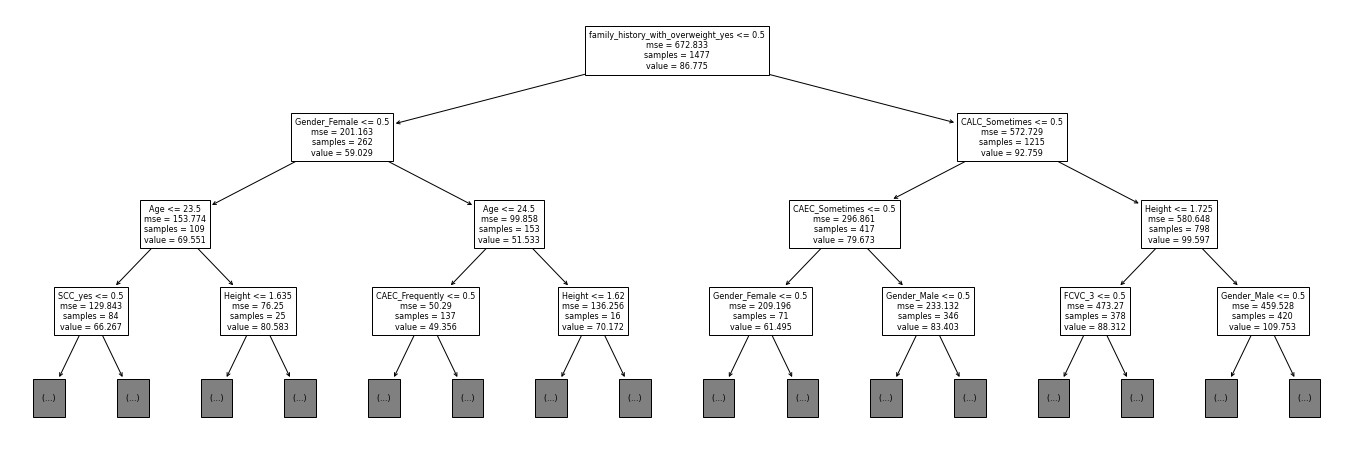

In [96]:
plt.figure(figsize=(24, 8))
plot_tree(model, feature_names=all_feature_names, max_depth=3, fontsize=8);

Visualizziamone dunque l'importanza delle diverse features: ciò consentirà di capire e comprendere quali sono i fattori predominanti per la stima del peso di un individuo.

In [97]:
pd.DataFrame({
    "Features importances": model.feature_importances_}, 
index=all_feature_names).sort_values("Features importances", ascending=False)

,Features importances
family_history_with_overweight_yes,0.253812
Height,0.150580
CALC_Sometimes,0.113021
FCVC_3,0.078923
Age,0.076160
Gender_Male,0.071300
CAEC_Sometimes,0.035445
MTRANS_Public_Transportation,0.032440
TUE_1,0.030556
Gender_Female,0.027857


Il risultato associato a ciascuna variabile indica quanto ciascuna variabile contribuisce alla capacità predittiva del modello.  
Si possono quindi trarre le seguenti conclusioni. I fattori più importanti sono:
- la presenza di familiari in sovrappeso (`family_history_with_overweight_yes`),
- l'altezza (`Height`),
- l'assunzione non frequente di alcol da parte dell'individuo (`CALC_Sometimes`),
- l'età (`Age`),
- una frequente assunzione di verdure nei pasti (`FCVC_3`).  

Da questi primi fattori, che sono i fattori più rilevanti, si può osservare come le caratteristiche fisiche dell'individuo siano importanti: altezza ed età influenzano significativamente il peso come ci si poteva aspettare.    
Si aggiunge inoltre che per la predizione sono altresì importanti anche le abitudini alimentari dell'individuo.  



Allo stesso tempo, però, il modello evidenzia, per esempio, come la bici usata come mezzo di trasporto principale (`MTRANS_Bike`), l'essere un fumatore (`SMOKE_yes`) e l'assenza di un familiare in sovrappeso (`family_history_with_overweight_no`) siano fattori irrilevanti nella predizione del peso secondo il modello creato.  
Infine le variabili relative al genere (`Gender_Female` e `Gender_Male`) hanno un'importanza abbastanza significativa, suggerendo che il genere potrebbe influenzare il peso, anche se l'importanza delle variabili di genere sembra essere minore rispetto ad altre variabili.

Quello che si nota, se confrontato a quanto fatto precedentemente, è che si ottiene l'importanza delle variabili nella predizione senza che vi sia una distinzione sull'influenza positiva o negativa. Ci si muove quindi verso una generalizzazione relativa all'importanza delle variabili.  
Muovendoci in tale direzione di generalizzazione, si vuole inoltre che non vi sia una distinzione di tutti i possibili valori che una variabile può assumere, giungendo alla generica conclusione di quanto una variabile sia importante o meno per il modello.  

Di seguito si definisce una funzione che ha proprio lo scopo di raggruppare tutte le features con lo stesso nome (che rappresentano quindi la stessa generica variabile) sommandone l'importanza di ciascuna di esse. Questo porterà ad ottenere l'importanza della singola variabile per la predizione, senza distinzione nelle sue possibili categorie e quindi senza distinzione nei suoi possibili valori.

In [98]:
feature_importance_series = pd.Series(model.feature_importances_, index=all_feature_names).sort_values(ascending=False)

In [99]:
def group_feature_importance(feature_importance_series):
    grouped_feature_importance = {}

    for feature_name, importance_score in feature_importance_series.iteritems():
        clean_feature_name = feature_name.split("_")[0]
    
        if clean_feature_name in grouped_feature_importance:
            grouped_feature_importance[clean_feature_name] += importance_score
        else:
            grouped_feature_importance[clean_feature_name] = importance_score

    grouped_feature_importance_series = pd.Series(grouped_feature_importance)
    grouped_feature_importance_series = grouped_feature_importance_series.sort_values(ascending=False)

    return grouped_feature_importance_series

In [100]:
tree_result = group_feature_importance(feature_importance_series)
tree_result

family   0.253812
Height   0.150580
CALC     0.115477
Gender   0.099157
FCVC     0.089590
Age      0.076160
NCP      0.048639
MTRANS   0.040640
CAEC     0.039226
TUE      0.038052
FAVC     0.020585
FAF      0.012671
CH2O     0.010973
SCC      0.004076
SMOKE    0.000360
dtype: float64

Si ottiene un'idea più chiara delle variabili rilevanti per il modello. Infatti, si comprende più facilmente se una variabile è rilevante o meno per il modello, senza dipendere dai possibili valori che essa può assumere.  
Si può quindi affermare che in tale modo si evidenzia l'importanza delle variabili.  

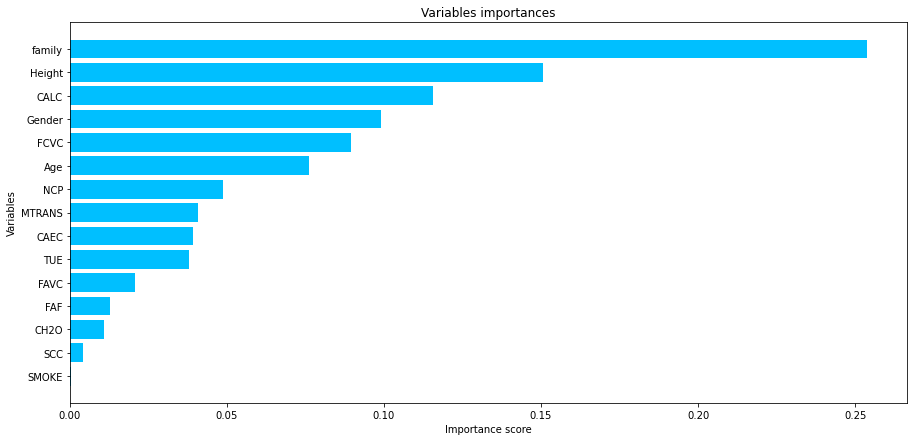

In [101]:
feature_names = tree_result.index
importance_values = tree_result.values

plt.figure(figsize=(15, 7))
plt.barh(feature_names, importance_values, color="deepskyblue")
plt.xlabel("Importance score")
plt.ylabel("Variables")
plt.title("Variables importances")
plt.gca().invert_yaxis()

**OSSERVAZIONI**  

Dal modello analizzato, si può affermare come i fattori predominanti disposti in ordine di importanza per predire il peso di un individuo siano:
- la presenza o meno di almeno un familiare in sovrappeso (`family_history_with_overweight`)
- l'altezza (`Height`)
- l'assunzione di alcol (`CALC`)
- il genere (`Gender`)
- l'assunzione di verdure all'interno dei pasti (`FCVC`)
- l'età (`Age`)

È comunque bene notare che un'alta importanza per una variabile non implica necessariamente una relazione causa-effetto con il peso: ne evidenzia in primis una correlazione rilevata dal modello per la predizione.  


Vi sono poi ulteriori fattori di importanza inferiore, disposti con il seguente ordine:
- la conoscenza del numero di pasti consumati giornalmente (`NCP`)
- la conoscenza del mezzo di trasporto principale che l'individuo sceglie per muoversi (`MTRANS`)
- la frequenza di consumo di cibi al di fuori dei pasti principali (`CAEC`)
- lo svolgimento di una vita sedentaria o meno (`TUE`)
- il consumo di cibi ad alto contenuto di zuccheri e grassi (`FAVC`)
- l'attività fisica svolta dall'individuo (`FAF`)


Infine, vi sono fattori che possiamo definire di rilevanza minima o quasi nulla come:
- il consumo di acqua (`CH2O`)
- monitorare o meno le calorie assunte (`SCC`)
- l'essere fumatore o meno (`SMOKE`)

### Foreste di alberi decisionali

Segue una creazione di una foresta di alberi di regressione: creando numerosi alberi decisionali si otterrà un'efficacia migliore di qualsiasi singolo albero della foresta, poichè ogni previsione di Random Forest è data dalla media delle previsioni di tutti gli alberi decisionali. Tale approccio fornirà risultati più robusti.

In [102]:
# Importazioni necessarie per crezione modello basato su foreste di alberi decisionali
from sklearn.ensemble import RandomForestRegressor

In [103]:
rfm = RandomForestRegressor(max_samples=0.3, max_features="sqrt", n_estimators=300, max_depth=None, n_jobs=-1)
rfm.fit(X_train_encoded, y_train)

RandomForestRegressor(max_features='sqrt', max_samples=0.3, n_estimators=300,
                      n_jobs=-1)

In [104]:
model_performance(X_val_encoded, y_val, rfm)

R²: 0.851702459687819
MSE: 106.06811951390424
Relative error: 9.460%


In [105]:
pd.DataFrame({
    "Features importances in random forest": rfm.feature_importances_}, 
index=all_feature_names).sort_values("Features importances in random forest", ascending=False)

,Features importances in random forest
Height,0.163843
Age,0.100885
family_history_with_overweight_no,0.093643
family_history_with_overweight_yes,0.076499
CAEC_Sometimes,0.055934
CALC_Sometimes,0.037321
Gender_Male,0.036571
Gender_Female,0.036433
FCVC_3,0.036171
NCP_3,0.032438


In [106]:
forest_feature_importance_series = pd.Series(rfm.feature_importances_, index=all_feature_names).sort_values(ascending=False)
forest_result = group_feature_importance(forest_feature_importance_series)
forest_result

family   0.170142
Height   0.163843
Age      0.100885
CAEC     0.091142
Gender   0.073004
CALC     0.071105
FCVC     0.064538
NCP      0.064460
FAF      0.047663
MTRANS   0.039826
TUE      0.036405
FAVC     0.031061
CH2O     0.029945
SCC      0.011613
SMOKE    0.004367
dtype: float64

L'analisi dell'importanza delle variabili è utile sia per i modelli basati su singoli alberi (_DecisionTreeRegressor_), sia per modelli basati su foreste di alberi (_Random Forest_). Tuttavia, l'importanza delle variabili assume significati leggermente diversi a seconda del tipo di modello esaminato.

1. **Decision Tree Regressor**: In un singolo albero decisionale, l'importanza delle variabili è misurata dal contributo delle variabili alle divisioni decisionali all'interno dell'albero. Le variabili che vengono scelte per le prime divisioni e che portano a significativi cambiamenti nelle previsioni hanno un'importanza maggiore. Si ottiene quindi una valutazione dell'importanza e dell'influenza delle variabili nel processo di suddivisione e predizione del singolo albero.

2. **Random Forest**: In una foresta di alberi, l'importanza delle variabili è calcolata considerando la media delle importanze su tutti gli alberi decisionali nell'ensemble. Questo fornisce una misura più robusta dell'importanza delle variabili. Le variabili che sono spesso scelte per le divisioni in molti alberi e che portano a miglioramenti significativi nelle previsioni hanno un'importanza maggiore. Si ottiene quindi una visione aggregata delle variabili che sono importanti per l'intero ensemble.

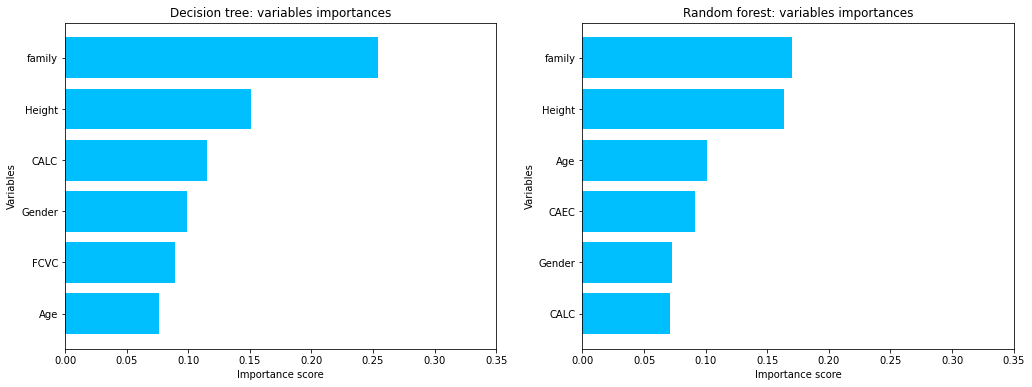

In [107]:
feature_names_1 = tree_result.index
importance_values_1 = tree_result.values

feature_names_2 = forest_result.index
importance_values_2 = forest_result.values

plt.figure(figsize=(17, 6))

# Primo grafico: albero decisionale
plt.subplot(1, 2, 1).barh(feature_names_1[:6], importance_values_1[:6], color="deepskyblue")
plt.xlabel("Importance score")
plt.ylabel("Variables")
plt.title("Decision tree: variables importances")
plt.gca().invert_yaxis()
plt.xlim(0, 0.35);

# Secondo grafico: foresta di alberi decisionali
plt.subplot(1, 2, 2).barh(feature_names_2[:6], importance_values_2[:6], color="deepskyblue")
plt.xlabel("Importance score")
plt.ylabel("Variables")
plt.title("Random forest: variables importances")
plt.gca().invert_yaxis()
plt.xlim(0, 0.35);

In [108]:
serie1_tree = tree_result.head(6)
serie2_forest = forest_result.head(6)

serie1_tree_names = set(serie1_tree.index)
serie2_forest_names = set(serie2_forest.index)

intersection_names_2 = serie1_tree_names & serie2_forest_names
intersection_names_2

{'Age', 'CALC', 'Gender', 'Height', 'family'}

Si può osservare graficamente (e si dimostra empiricamente) che entrambi i modelli di predizione sono giunti alla stessa conclusione: 
- l'altezza (`Height`), 
- la familiarità o meno di sovrappeso (`family_history_with_overweight`), 
- l'assunzione di alcol (`CALC`), 
- il genere (`Gender`), 
- l'età (`Age`) 

sono i fattori che compaiono in entrambi i modelli e che possono essere definti come i valori più influenti nella predizione del peso di un individuo.

Infine, di seguito, si individuano le variabili comuni ai modelli di regressione lineare e ai modelli basati sugli alberi decisionali, con lo scopo di ottenere le variabili più rilevanti per ciascun modello.

In [109]:
models_intersection_names = intersection_names & intersection_names_2
models_intersection_names

{'Age', 'Height'}

**OSSERVAZIONI**

Si osserva come l'età e l'altezza siano definibili come variabili rilevanti in _tutti_ i modelli analizzati. É bene notare che esse sono le uniche due variabili numeriche che vengono utilizzate nella predizione, tenendo conto che tutte le restanti variabili sono definite come categoriche. Nonostante ciò, il loro impatto e la loro rilevanza è comune in tutti i modelli predittivi analizzati.  



I dati riguardanti le caratteristiche fisiche di un individuo sono fondamentali per predire il peso; è inoltre importante conoscere anche il genere.  
Tra le abitudini alimentari dell'individuo si conferma nuovamente come sia importante conoscere la sua assunzione di alcol: in generale, l'assunzione di alcol può contribuire ad un aumento di calorie consumate, influenza l'appetito e le scelte alimentari, e può anche avere effetti sulla regolarità dell'attività fisica e sul metabolismo.  
Inoltre, conoscere se un individuo ha o meno familiari in sovrappeso è utile per predire il peso perché l'ereditarietà potrebbe giocare un ruolo significativo nella predisposizione al sovrappeso e all'obesità. Se ci sono familiari in sovrappeso, è più probabile che l'individuo abbia una predisposizione genetica a un metabolismo più lento o a una maggiore tendenza ad accumulare grasso. Questo fattore genetico può interagire con il proprio stile di vita.   
Quindi, avere familiari in sovrappeso può aumentare il rischio individuale di sviluppare problemi di peso e obesità, anche a causa delle cattive abitudini che i familiari possono trasmettere all'individuo, come per esempio l'assunzione di cibi calorici e la bassa frequenza di attività fisica.

## Modello predittivo _con_ conoscenza a priori della classe di obesità dell'individuo.

Come anticipato precedentemente, di seguito si analizza il modello nel quale si considera la classe di obesità dell'individuo, supponendo che essa sia nota a priori.  
Possedendo la classe di obesità come variabile aggiuntiva, si forniscono al modello ulteriori informazioni sulla distribuzione del peso nelle diverse categorie di obesità. Questa informazione può aiutare il modello a catturare meglio le differenze nella distribuzione del peso tra le diverse classi di obesità e di conseguenza a realizzarne un modello più preciso.

In [110]:
X_new = dataset.drop(columns=["Weight"])  # Features: inclusione delle classi di obesità 
y_new = dataset["Weight"]                 # Target

# Training set (70%) e validation set (30%)
X_train_new, X_val_new, y_train_new, y_val_new = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

In [111]:
X_train_new.head()

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1930,Female,26,1.630000,yes,yes,3,3,Sometimes,no,1,no,0,1,Sometimes,Public_Transportation,Obesity_Type_III
1803,Female,26,1.660000,yes,yes,3,3,Sometimes,no,3,no,0,0,Sometimes,Public_Transportation,Obesity_Type_III
1198,Male,18,1.750000,yes,yes,3,3,Sometimes,no,3,no,1,0,Sometimes,Public_Transportation,Overweight_Level_II
15,Female,22,1.700000,yes,no,3,3,Always,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
816,Male,23,1.670000,yes,yes,2,3,Sometimes,no,2,no,0,2,Sometimes,Public_Transportation,Overweight_Level_I


Di conseguenza si ha una nuova definizione delle variabili. In particolare, ciò che cambia è la ri-definizione delle variabili categoriche, poichè ora si include la variabile categorica (nominale) `NObeyesdad`.

In [112]:
categorical_vars_new = ["Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC", 
                        "FCVC", "NCP", "CAEC", "CH2O", "FAF", "TUE", "CALC", "MTRANS", "NObeyesdad"]

Con questo nuovo modello si andranno a considerare subito tutte le variabili del dataset, nel senso che non saranno presenti passi intermedi in cui il modello verrà valutato sulle sole variabili numeriche o sulle sole variabili categoriche "nuove".  
La valutazione del modello avverrà direttamente su tutte le variabili, nessuna esclusa.   
La logica ovviamente rimane la medesima di quanto fatto precedentemente: 
- standardizzazione per le variabili numeriche,
- one-hot encoding per le variabili categoriche.

In [113]:
model = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric", StandardScaler(), numeric_vars),
        ("categorical", OneHotEncoder(), categorical_vars_new)
    ])),
    ("regr", Ridge())
])
model.fit(X_train_new, y_train)
model_performance(X_val_new, y_val_new, model)

R²: 0.9643445462236232
MSE: 25.502155494379334
Relative error: 4.505%


Si evidenzia come si sia ottenuto un modello decisamente buono, in grado di fare buone predizioni in merito alla variabile target.  
Infatti, un R² di 0.96 è un risultato elevato, il quale suggerisce che il modello creato (che include tutte le possibili variabili) ha una forte capacità predittiva e spiega una grande parte della variabilità presente nella variabile target (il peso `Weight`).

- Individuazione dei migliori parametri e del migliore modello

In [114]:
import warnings

# Ignoro i warning relativi alla mancata convergenza di un minimo della funzione obiettivo entro un certo numero di iterazioni. 
warnings.filterwarnings("ignore", category=Warning)

model = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric",  Pipeline([
            ("scaler", None),
            ("poly", PolynomialFeatures(include_bias=False))
        ]), numeric_vars),
        ("categorical", OneHotEncoder(), categorical_vars_new)
    ])),
    ("regr", None)
])

# Grid search su scelte preprocessing e scelta modello
grid = [
    { # scelte preprocessing + Ridge
        "preproc__numeric__scaler": ["passthrough", StandardScaler()],
        "preproc__numeric__poly__degree": [1, 2, 3],
        "preproc__categorical__drop": [None, "first"],
        "regr": [Ridge()],
        "regr__alpha": [0.1, 1.0, 10.0] 
    },
    { # scelte preprocessing + Lasso
        "preproc__numeric__scaler": ["passthrough", StandardScaler()],
        "preproc__numeric__poly__degree": [1, 2, 3],
        "preproc__categorical__drop": [None, "first"],
        "regr": [Lasso()],
        "regr__alpha": [0.1, 1.0, 10.0] 
    },
    { # scelte preprocessing + Elastic Net
        "preproc__numeric__scaler": ["passthrough", StandardScaler()],
        "preproc__numeric__poly__degree": [1, 2, 3],
        "preproc__categorical__drop": [None, "first"],
        "regr": [ElasticNet()],
        "regr__alpha": [0.1, 1.0],
        "regr__l1_ratio": [0.1, 0.2, 0.5, 0.7, 0.9, 1],
    }
]

kf = KFold(3, shuffle=True, random_state=42)
gs = GridSearchCV(model, grid, cv=kf, scoring="r2")
gs.fit(X_train_new, y_train_new)

print("Migliori parametri:", gs.best_params_)

Migliori parametri: {'preproc__categorical__drop': 'first', 'preproc__numeric__poly__degree': 3, 'preproc__numeric__scaler': StandardScaler(), 'regr': Ridge(alpha=0.1), 'regr__alpha': 0.1}


In [115]:
model_performance(X_val_new, y_val_new, gs)

R²: 0.9667813768831273
MSE: 23.759240237097732
Relative error: 4.409%


In [116]:
model_performance(X_train_new, y_train_new, gs)

R²: 0.9676555850760444
MSE: 21.762382529858932
Relative error: 4.333%


Dai nuovi risultati ottenuti, si possono fare le seguenti nuove considerazioni:  

1. **Migliori parametri:** I migliori parametri identificati dalla grid search sono:
   - Per le variabili numeriche: standardizzazione e features polinomiali di grado 3.
   - Per le variabili categoriche: drop della prima colonna dopo one-hot encoding.
   - Per la regolarizzazione: alpha pari a 0.1, ossia applicazione di una regolarizzazione relativamente bassa.  
   
   
2. **Elevata capacità predittiva:** Il modello ottenuto ha una capacità predittiva molto elevata. Il valore di R² vicino a 1 indica che è in grado di fare previsioni molto precise sul peso (`Weight`) basandosi sulle features fornite. Allo stesso tempo, anche i valori bassi ottenuti per l'MSE e l'errore relativo confermano la bontà del modello.  


3. **Scelte di preprocessing:** La scelta di standardizzare le variabili numeriche e generare features polinomiali con grado 3 sembra essere efficace per il modello, in quanto ha portato a prestazioni elevate. Inoltre, la decisione di eliminare la prima colonna dopo il one-hot encoding per le variabili categoriche sembra essere utile, probabilmente per evitare il problema della multi-collinearità tra le variabili.

Si analizza infine un ultimo modello basato sugli alberi decisionali come fatto precedentemente, con lo scopo di capire effettivamente da cosa sia dato il miglioramento nella predizione rispetto al precedente modello basato sugli alberi decisionali.  
Decido inoltre di non applicare la standardizzazione alle variabili numeriche per il solo scopo di comprendere con maggiore chiarezza il relativo output dell'albero decisionale.

In [117]:
preprocessor = ColumnTransformer([
    ("numeric", "passthrough", numeric_vars),
    ("categorical", OneHotEncoder(), categorical_vars_new)
])

X_train_encoded_new = preprocessor.fit_transform(X_train_new)
X_val_encoded_new = preprocessor.transform(X_val_new)

model = DecisionTreeRegressor(max_depth=8, random_state=42)
model.fit(X_train_encoded_new, y_train_new)

all_feature_names_new = np.r_[
    numeric_vars,
    preprocessor.named_transformers_["categorical"].get_feature_names(categorical_vars_new),
].tolist()

tree_text_new = export_text(model, feature_names=all_feature_names_new)

# Divido l'output per righe: mostro solo le prime 100
tree_rows_new = tree_text_new.split("\n")
for row in tree_rows_new[:100]:
    print(row)

|--- NObeyesdad_Obesity_Type_III <= 0.50
|   |--- NObeyesdad_Obesity_Type_II <= 0.50
|   |   |--- NObeyesdad_Insufficient_Weight <= 0.50
|   |   |   |--- NObeyesdad_Normal_Weight <= 0.50
|   |   |   |   |--- Height <= 1.74
|   |   |   |   |   |--- NObeyesdad_Overweight_Level_I <= 0.50
|   |   |   |   |   |   |--- Height <= 1.60
|   |   |   |   |   |   |   |--- NObeyesdad_Overweight_Level_II <= 0.50
|   |   |   |   |   |   |   |   |--- value: [79.08]
|   |   |   |   |   |   |   |--- NObeyesdad_Overweight_Level_II >  0.50
|   |   |   |   |   |   |   |   |--- value: [66.83]
|   |   |   |   |   |   |--- Height >  1.60
|   |   |   |   |   |   |   |--- NObeyesdad_Overweight_Level_II <= 0.50
|   |   |   |   |   |   |   |   |--- value: [87.43]
|   |   |   |   |   |   |   |--- NObeyesdad_Overweight_Level_II >  0.50
|   |   |   |   |   |   |   |   |--- value: [80.91]
|   |   |   |   |   |--- NObeyesdad_Overweight_Level_I >  0.50
|   |   |   |   |   |   |--- Height <= 1.64
|   |   |   |   |   |  

Dall'output ottenuto si comprende come ragiona l'albero decisionale. Una breve spiegazione è spiegata qui di seguito:

Se l'individuo non è obeso di livello 3 (massimo livello di obesità), ossia se "NObeyesdad_Obesity_Type_III" è uguale a 0:
- Se `NObeyesdad_Obesity_Type_II` è uguale a 0, cioè non è obeso di livello 2:
  - Se `NObeyesdad_Insufficient_Weight` è uguale a 0, cioè non è di peso insufficiente:
    - Se `NObeyesdad_Normal_Weight` è uguale a 0, cioè non è di peso normale:
      - Se `Height` (cioè l'altezza) è minore o uguale a 1.74:
        - Se `NObeyesdad_Overweight_Level_I` è uguale a 0, cioè non è in sovrappeso di livello I:
          - Se l'altezza (`Height`) è minore o uguale a 1.60:
            - Se `NObeyesdad_Overweight_Level_II` è uguale a 0, cioè non è in sovrappeso di livello II:
              - Allora il peso stimato è di 79.08 kg e l'individuo sarà classificato per esclusione come obeso di livello I.
            - Se `NObeyesdad_Overweight_Level_II` è 1, cioè è in sovrappeso di livello II:
              - Allora il peso stimato è di 66.83 kg. 
          - Se l'altezza (`Height`) è maggiore di 1.60:
            - si prosegue con questa logica ...

In [118]:
# Ricerca della profondità dell'albero migliore
grid = {
    "max_depth": range(1,21)
}

kf = KFold(3, shuffle=True, random_state=42)
model = DecisionTreeRegressor(random_state=42)
gs = GridSearchCV(model, grid, cv=kf)
gs.fit(X_train_encoded_new, y_train_new)

print("Miglior valore di max_depth: ", gs.best_params_)

Miglior valore di max_depth:  {'max_depth': 9}


In [119]:
model = DecisionTreeRegressor(max_depth=9, random_state=42)
model.fit(X_train_encoded_new, y_train)
model_performance(X_val_encoded_new, y_val_new, model)

R²: 0.9801564523991405
MSE: 14.192870455417339
Relative error: 3.186%


Si ottiene un ottimo modello, capace di fare ottime previsioni sul validation set.  

- Rappresentazione grafica dell'albero decisionale

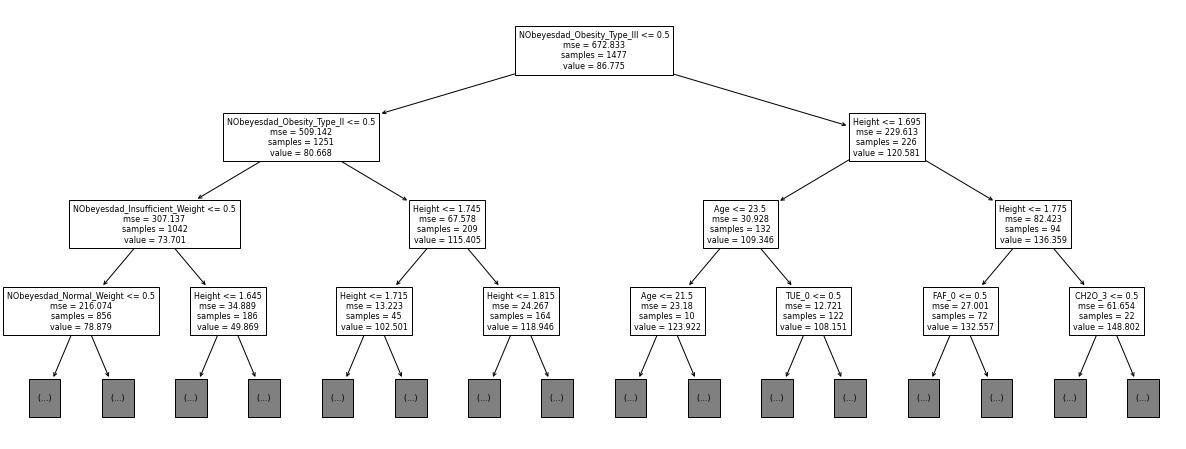

In [120]:
plt.figure(figsize=(21, 8))
plot_tree(model, feature_names=all_feature_names_new, max_depth=3, fontsize=8);

In [121]:
pd.DataFrame({
    "Features importances new": model.feature_importances_}, 
index=all_feature_names_new).sort_values("Features importances new", ascending=False)

,Features importances new
NObeyesdad_Obesity_Type_III,0.309189
NObeyesdad_Obesity_Type_II,0.306991
NObeyesdad_Insufficient_Weight,0.130377
Height,0.127606
NObeyesdad_Normal_Weight,0.072657
NObeyesdad_Obesity_Type_I,0.017689
NObeyesdad_Overweight_Level_I,0.013799
NObeyesdad_Overweight_Level_II,0.006588
Age,0.005328
Gender_Male,0.002301


Come si poteva immaginare, è evidente l'impatto della variabile `NObeyesdad`, ossia la variabile categorica che rappresenta le possibili categorie (e quindi i possibili valori) che può assumere un individuo in termini di classi di obesità.  
Il modello è infatti in grado di predire molto bene il peso di un individuo conoscendone le classi di obesità possibili.  
Tant'è che i primi valori disposti in ordine di importanza per il modello analizzato sono: 

In [122]:
feature_importance_series_new = pd.Series(model.feature_importances_, index=all_feature_names_new).sort_values(ascending=False)
feature_importance_series_new.head().index.tolist()

['NObeyesdad_Obesity_Type_III',
 'NObeyesdad_Obesity_Type_II',
 'NObeyesdad_Insufficient_Weight',
 'Height',
 'NObeyesdad_Normal_Weight']

- `NObeyesdad_Obesity_Type_III`: massimo livello di obesità (livello 3) 
- `NObeyesdad_Obesity_Type_II`: obesità di livello 2
- `NObeyesdad_Insufficient_Weight`: peso insufficiente
- `Height`: l'altezza
- `NObeyesdad_Normal_Weight`: peso normale


Tra questi possibili valori relativi alla variabile `NObeyesdad`, ne emerge però anche la variabile numerica `Height`, che esprime l'altezza di un individuo.
Si può quindi affermare (e confermare) che per predire il peso di un individuo è importante la conoscenza dell'altezza, come già si era notato nei precedenti modelli.  


Nella predizione del peso sono rilevanti anche ulteriori fattori, come:
- l'età (`Age`) 
- il mezzo di trasporto principale: l'automobile (`MTRANS_Automobile`) piuttosto che la bicicletta (`MTRANS_Bike`)
- l'essere una femmina (`Gender_Female`)
- l'assenza di tempo dedicato alle attività sedentarie (`TUE_0`)  

Tuttavia essi sono espressi da valori piuttosto bassi poichè gli elementi che permettono al modello di effettuare una buona predizione sono quelli sopracitati. Questi utlimi incidono nella predizione, ma non in modo così rilevante.

Non sono invece importanti fattori come:
- se l'individuo è un fumatore o meno (`SMOKE_yes` o `SMOKE_no`)
- l'assunzione non frequente di cibi al di fuori dei pasti principali (`CAEC_Sometimes`)
- la scelta della bici come mezzo di trasporto principale (`MTRANS_Bike`)

Come fatto precedentemente, di seguito si analizza l'importanza delle singole variabili senza effettuarne una distinzione dei possibili valori.

In [123]:
tree_result_new = group_feature_importance(feature_importance_series_new)
tree_result_new

NObeyesdad   0.857290
Height       0.127606
Age          0.005328
Gender       0.002301
CH2O         0.001789
TUE          0.001628
MTRANS       0.001463
FCVC         0.001054
FAF          0.000957
NCP          0.000242
FAVC         0.000114
family       0.000105
CALC         0.000070
CAEC         0.000051
SMOKE        0.000000
SCC          0.000000
dtype: float64

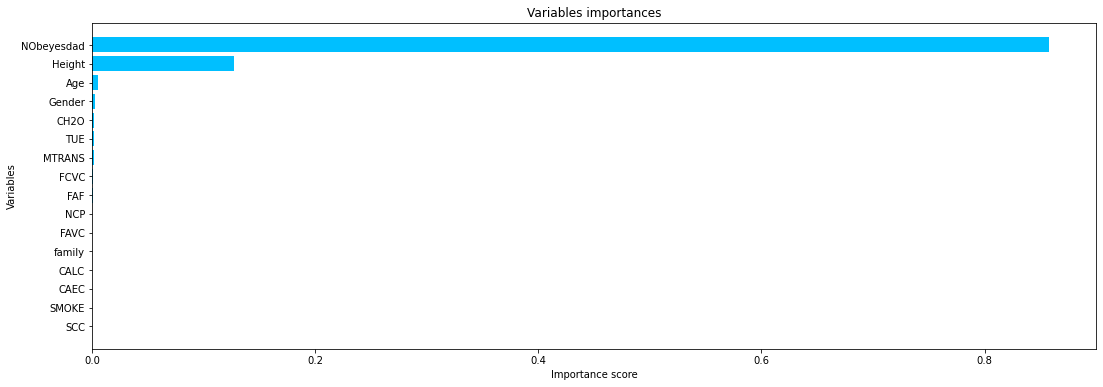

In [124]:
feature_names = tree_result_new.index
importance_values = tree_result_new.values

plt.figure(figsize=(18, 6))
plt.barh(feature_names, importance_values, color="deepskyblue")
plt.xlabel("Importance score")
plt.ylabel("Variables")
plt.title("Variables importances")
plt.gca().invert_yaxis()

Dal grafico si intuisce ancora meglio l'importanza della conoscenza della classe di obesità: se si ha una conoscenza di essa, 
si ha una predominanza sulle restanti variabili in termini di importanza per la predizione e (quasi) solo la sua informazione ne permette di realizzare un ottimo modello.  
Si osserva, infine, in un unico grafico la differenza di importanza delle variabili per i due modelli predittivi basati sugli alberi decisionali.

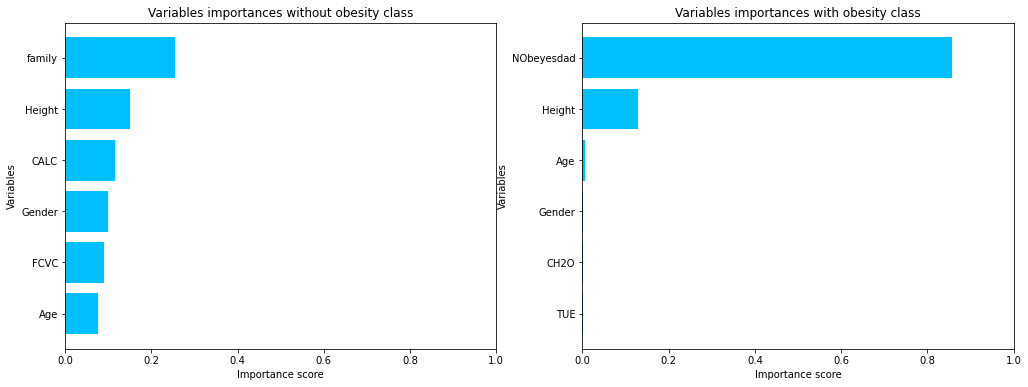

In [125]:
feature_names_1 = tree_result.index
importance_values_1 = tree_result.values

feature_names_2 = tree_result_new.index
importance_values_2 = tree_result_new.values

plt.figure(figsize=(17, 6))

# Primo grafico: senza classe di obesità
plt.subplot(1, 2, 1).barh(feature_names_1[:6], importance_values_1[:6], color="deepskyblue")
plt.xlabel("Importance score")
plt.ylabel("Variables")
plt.title("Variables importances without obesity class")
plt.gca().invert_yaxis()
plt.xlim(0, 1);

# Secondo grafico: con classe di obesità
plt.subplot(1, 2, 2).barh(feature_names_2[:6], importance_values_2[:6], color="deepskyblue")
plt.xlabel("Importance score")
plt.ylabel("Variables")
plt.title("Variables importances with obesity class")
plt.gca().invert_yaxis()
plt.xlim(0, 1);

**OSSERVAZIONI CONCLUSIVE**  

- **Modello _senza_ conoscenza della classe di obesità**: il modello, non possedendo la classe di obesità dell'individuo come variabile di input, fa affidamento solo sulle altre variabili disponibili per effettuare le predizioni sul peso. La classe di obesità contiene informazioni aggiuntive inerenti alla distribuzione del peso; di conseguenza il modello che ora non possiede queste informazioni ha una maggiore difficoltà nello spiegare tutta la variabilità del peso. Si ottiene di fatti un R² discreto.
  La predizione del peso si basa quindi in primo luogo su caratteristiche fisiche come altezza, età e genere, su abitudini alimentari come l'assunzione di alcol ma anche l'assunzione di verdure, e infine anche sulla presenza o meno di familiari in sovrappeso.  


- **Modello _con_ conoscenza della classe di obesità**: il modello, avendo accesso alla classe di obesità come variabile di input, è in grado di utilizzare queste informazioni per migliorare le sue predizioni. La classe di obesità è fortemente correlata al peso (oltre che ad altri fattori) e di conseguenza fornisce al modello una comprensione più completa della relazione tra le variabili di input e il peso. Il modello ha quindi maggiori possibilità di spiegare la variabilità del peso e perciò si ottiene un R² più alto.  
  Ora, la predizione del peso si basa in primo luogo sulla classe di obesità e solo in secondo luogo sull'altezza, sull'età e sul genere.  
  

Tuttavia, ciò non significa che il modello senza la classe di obesità sia necessariamente meno utile o errato: addirittura lo si può definire come "più realistico", poichè volendo predire il peso di una persona in base alle sue abitudini alimentari, allo stile di vita e alle proprie caratteristiche fisiche, solitamente non si è a conoscenza della classe di obesità se non esplicitamente nota.  
Tant'è che le variabili fornite hanno comunque un certo impatto sul peso di una persona e possono quindi essere considerate valide per la predizione approssimativa del peso. 